# Price Prediction for House Sales in King Count USA 

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms where .5 describes that a room with toilet but not shower                               |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | Whether apartment is overlooking waterfront or not. It is dummy variable (only 0 or 1)                      |
| view          | How good is the view of apartment? Rating from 0 - 4                                                        |
| condition     | How good the condition is overall. Rating from 1 to 5                                                                         |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |

Goals

1) Reveal trends in the dataset.
2) Create a predictive model of at least 85% accuracy.
3) Identify which features contribute the most to house pricing.

In [119]:
# Import packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [120]:
# Import dataset

file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [121]:
#df = pd.read_csv(file_name)
#df.to_csv('/Users/joycegemcanete/DataAnalyst2025/original-data-house-data-2015')
df = pd.read_csv('/Users/joycegemcanete/DataAnalyst2025/original-data-house-data-2015')

# DATA WRANGLING

In [122]:
# Set display to show ALL columns (no truncation)
pd.set_option('display.max_columns', None)

df.describe(include='all').T  # Transpose rows/columns and display both numerical and categorical columns

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0.1,21613.0,NaN,NaN,NaN,10806.0,6239.28002,0.0,5403.0,10806.0,16209.0,21612.0
Unnamed: 0,21613.0,NaN,NaN,NaN,10806.0,6239.28002,0.0,5403.0,10806.0,16209.0,21612.0
id,21613.0,NaN,NaN,NaN,4580301520.864988,2876565571.312049,1000102.0,2123049194.0,3904930410.0,7308900445.0,9900000190.0
date,21613,372,20140623T000000,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,21613.0,NaN,NaN,NaN,540088.141767,367127.196483,75000.0,321950.0,450000.0,645000.0,7700000.0
bedrooms,21600.0,NaN,NaN,NaN,3.37287,0.926657,1.0,3.0,3.0,4.0,33.0
bathrooms,21603.0,NaN,NaN,NaN,2.115736,0.768996,0.5,1.75,2.25,2.5,8.0
sqft_living,21613.0,NaN,NaN,NaN,2079.899736,918.440897,290.0,1427.0,1910.0,2550.0,13540.0
sqft_lot,21613.0,NaN,NaN,NaN,15106.967566,41420.511515,520.0,5040.0,7618.0,10688.0,1651359.0
floors,21613.0,NaN,NaN,NaN,1.494309,0.539989,1.0,1.0,1.5,2.0,3.5


In [123]:
cols = df.columns.to_list
cols

<bound method IndexOpsMixin.tolist of Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'date', 'price', 'bedrooms',
       'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')>

In [124]:
# Delete non-parametric columns. Retain ID column for easy dropping of houses later.

other_cols = ['Unnamed: 0.1', 'Unnamed: 0']

df = df.drop(other_cols, axis=1)
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [125]:
missing_values = df.isna().sum()
missing_values

id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [126]:
# drop missing rows with value/s

df = df.dropna()

In [127]:
# Get the dataset info to view row counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21597 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  float64
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long       

In [128]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## TARGET VARIABLE: PRICE

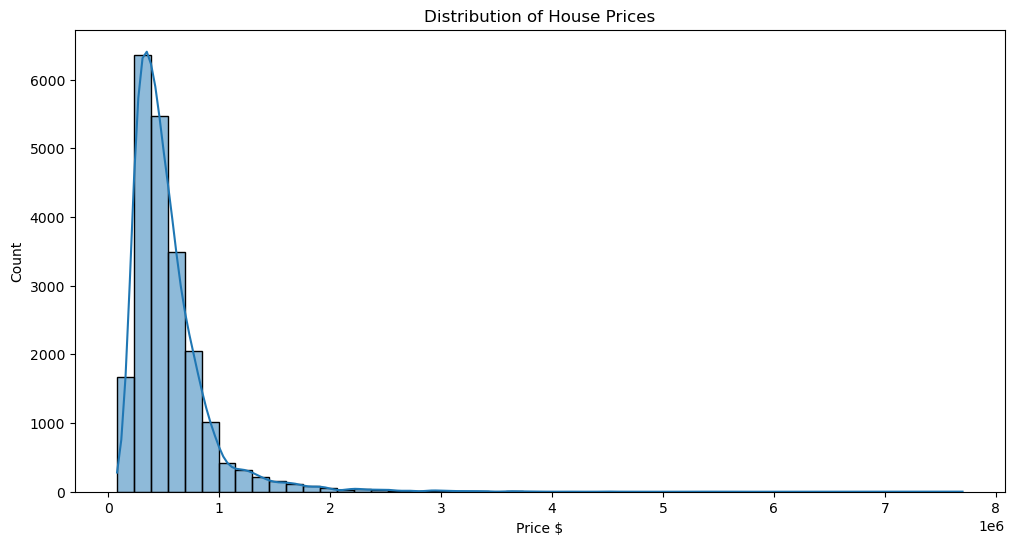

In [129]:
# Check distribution of price data


plt.figure(figsize=(12,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price $')
plt.ylabel('Count')
plt.show()

Since the data is left skewed, we apply log transformation.

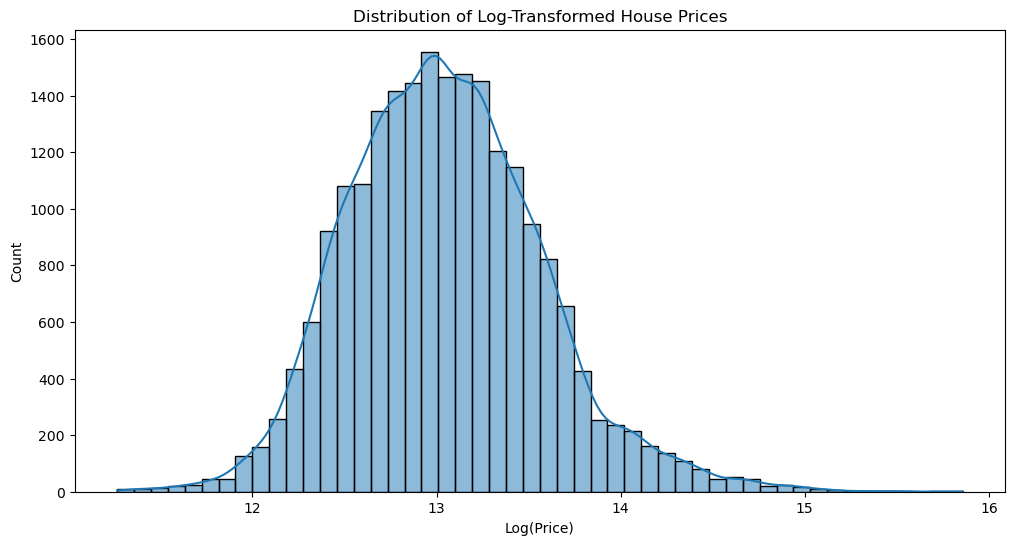

In [130]:
# Log transformation of price

plt.figure(figsize=(12, 6))
sns.histplot(np.log1p(df['price']), bins=50, kde=True)
plt.title('Distribution of Log-Transformed House Prices')
plt.xlabel('Log(Price)')
plt.ylabel('Count')
plt.show()

Log transformation resulted in a bell-shaped distribution.

In [131]:
# Apply log transformation to price

df['price'] = np.log1p(df['price'])

## STRATEGIES FOR EXAMINING DATA

- Bedrooms range from 1 to 33 -- is this realistic? 
- Bathrooms range from 0.5 to 8 -- 0.5 does not make since as there is no half-bathroom
- Floors range from 1 to 3.5
- Waterfront is binary
- View ranges from 0 to 4 viewing times
- King County grading is correct as it is from 1 to 13
- Year built is from 1900 to 2015 -- this may be binned per decade
- Year renovated is 0 or 2015 -- this may be converted into renovation status of yes or no for simplicity

In [132]:
features = ['bedrooms', 'bathrooms', 'floors', 
                'waterfront', 'view', 'condition', 'grade']

In [133]:
# Calculate unique values for each column
unique_counts = df[features].nunique()

# Display as a DataFrame 
unique_counts_df = pd.DataFrame({'Column': unique_counts.index, 
                                'Unique Values': unique_counts.values})
print(unique_counts_df)

       Column  Unique Values
0    bedrooms             12
1   bathrooms             29
2      floors              6
3  waterfront              2
4        view              5
5   condition              5
6       grade             11


It does not make sense how bathrooms range from 0.5 to 8 but has 29 unique values. Same for floors. This needs to be investigated further.

## FEATURE: BATHROOM

In [134]:
# For 'bathrooms'
bathroom_counts = df['bathrooms'].value_counts().sort_index()
print("Bathrooms Tally:")
print(bathroom_counts)

Bathrooms Tally:
bathrooms
0.50       4
0.75      71
1.00    3851
1.25       9
1.50    1445
1.75    3048
2.00    1930
2.25    2047
2.50    5377
2.75    1185
3.00     753
3.25     589
3.50     731
3.75     155
4.00     136
4.25      79
4.50     100
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
Name: count, dtype: int64


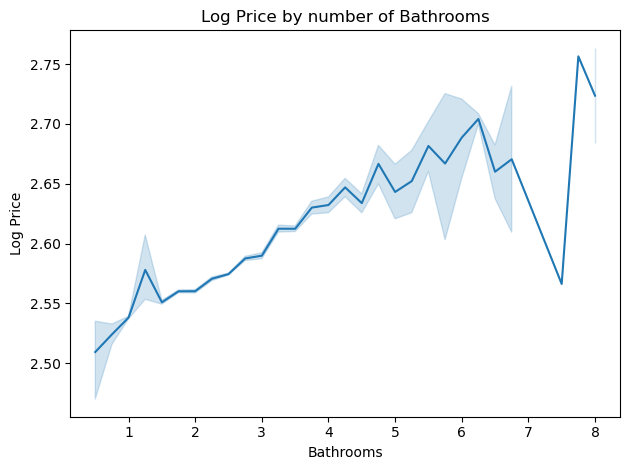

In [135]:
# Visualize relationship with price to decide whether we can keep it as is or do a data cleaning/transformation

sns.lineplot(x=df['bathrooms'], y=np.log(df['price']))
plt.title('Log Price by number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Log Price')
plt.tight_layout()
plt.show()

In [136]:
# Let's try rounding up method such that 0.5 to 1.25 is 1, 1.5 to 2.25 is 2, and so on.

df['bathrooms_rounded'] = np.where(
    df['bathrooms'] % 1 > 0.25,  # Check if decimal part > 0.25
    np.ceil(df['bathrooms']),     # If yes, round UP
    np.floor(df['bathrooms'])     # If no, round DOWN
).astype(int)  # Convert to integer

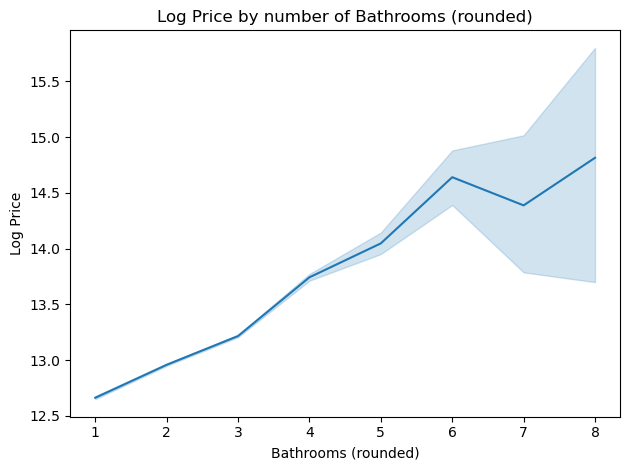

In [137]:
# Revisualize the new bathroom column

sns.lineplot(x=df['bathrooms_rounded'], y=df['price'])
plt.title('Log Price by number of Bathrooms (rounded)')
plt.xlabel('Bathrooms (rounded)')
plt.ylabel('Log Price')
plt.tight_layout()
plt.show()


There is a weird downward spike starting at 7 bathrooms.

In [138]:
df_7and8_bath = df[df['bathrooms_rounded'].isin([7, 8])].sort_values('price', ascending=False)
df_7and8_bath

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bathrooms_rounded
7252,6762700020,20141013T000000,15.856731,6.0,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,8
9254,9208900037,20140919T000000,15.744856,6.0,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,8
8092,1924059029,20140617T000000,15.356241,5.0,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454,7
12777,1225069038,20140505T000000,14.639686,7.0,8.00,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800,8
21506,2524069097,20140509T000000,14.621491,5.0,6.50,7270,130017,2.0,0,0,3,12,6420,850,2010,0,98027,47.5371,-121.982,1800,44890,7
20578,424069279,20150328T000000,13.981026,6.0,6.50,6260,10955,2.0,0,0,3,11,4840,1420,2007,0,98075,47.5947,-122.039,2710,12550,7
4024,9175600025,20141007T000000,13.592368,7.0,6.75,7480,41664,2.0,0,2,3,11,5080,2400,1953,0,98166,47.4643,-122.368,2810,33190,7
8546,424049043,20140811T000000,13.017005,9.0,7.50,4050,6504,2.0,0,0,3,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866,8


- #4024 low house price does not make sense, 13.59 (800,000$) is too low for a house that has high bedroom and bathroom count, and bigger sqft specs.
- #8546 low house price is slightly acceptable given that it also has low sqft specs.

In [139]:
# Store dropped col/s for documentation
drop1 = df[df['id'].isin([9175600025])]

# Drop row

df = df[~df['id'].isin([9175600025])]

No rows appear unusual.

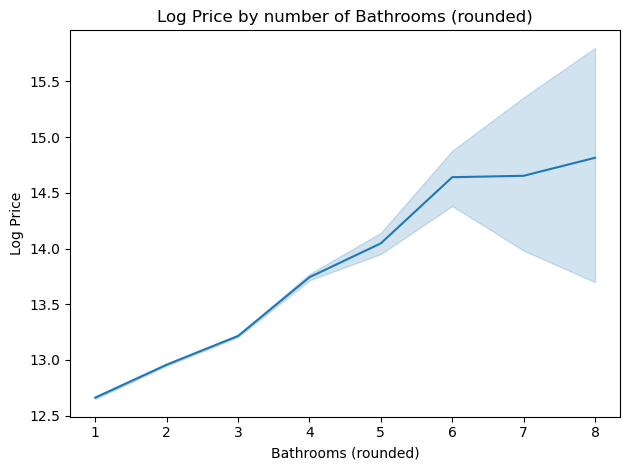

In [140]:
# Revisualize again

sns.lineplot(x=df['bathrooms_rounded'], y=df['price'])
plt.title('Log Price by number of Bathrooms (rounded)')
plt.xlabel('Bathrooms (rounded)')
plt.ylabel('Log Price')
plt.tight_layout()
plt.show()

## FEATURE: BEDROOMS

In [141]:
# For 'bedrooms'
bedroom_counts = df['bedrooms'].value_counts().sort_index()
print("Bedrooms Tally:")
print(bedroom_counts)

Bedrooms Tally:
bedrooms
1.0      196
2.0     2760
3.0     9824
4.0     6882
5.0     1601
6.0      272
7.0       37
8.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: count, dtype: int64


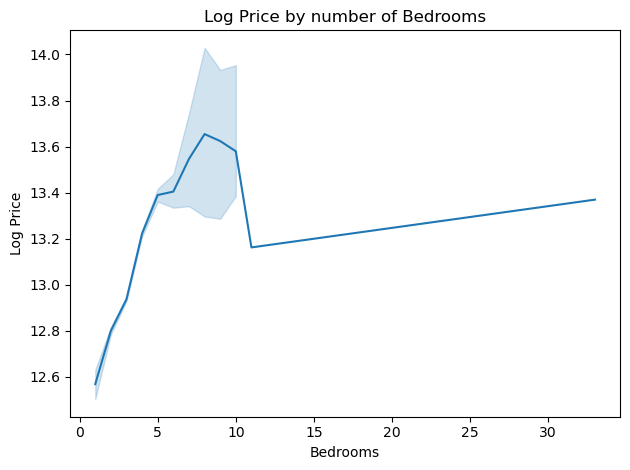

In [142]:
# Visualize relationship of bedrooms with price to decide whether we can keep it as is or do a data cleaning/transformation

sns.lineplot(x=df['bedrooms'], y=df['price'])
plt.title('Log Price by number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Log Price')
plt.tight_layout()
plt.show()

- There is a low data count of bedrooms from 8.0 to 33 count, and the trend does not make sense within this range. Let's evaluate these data points to help decide whether there is a need to drop these rows.
- We will also focus on the high bedroom # that dipped their price, and check if this dip is justified by other features.
- In the next lines of codes, we will compare the correlation scores for a data subset containing less than 9 bedrooms and those that have more.

In [143]:
# Filter and display rows low less than 9 bedrooms then sort by price
low_bedroom_homes = df[df['bedrooms'] <= 8]
low_bedroom_homes.sort_values('bedrooms', ascending=False).head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bathrooms_rounded
17235,1338600225,20140528T000000,14.493545,8.0,3.50,4440,6480,2.0,0,3,5,10,3140,1300,1959,0,98112,47.6310,-122.303,4440,8640,4
1660,9126101740,20141204T000000,13.102163,8.0,5.00,2800,2580,2.0,0,0,3,8,1880,920,1997,0,98122,47.6086,-122.303,1800,2580,5
15670,8141200080,20140814T000000,13.429850,8.0,2.75,2530,4800,2.0,0,0,4,7,1390,1140,1901,0,98112,47.6241,-122.305,1540,4800,3


In [144]:
# Filter and display rows with more than 8 bedrooms then sort by price
high_bedroom_homes = df[df['bedrooms'] > 8]
high_bedroom_homes.sort_values('bedrooms', ascending=False).head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bathrooms_rounded
15870,2402100895,20140625T000000,13.369225,33.0,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,2
8757,1773100755,20140821T000000,13.161586,11.0,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960,3
13314,627300145,20140814T000000,13.953533,10.0,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400,5


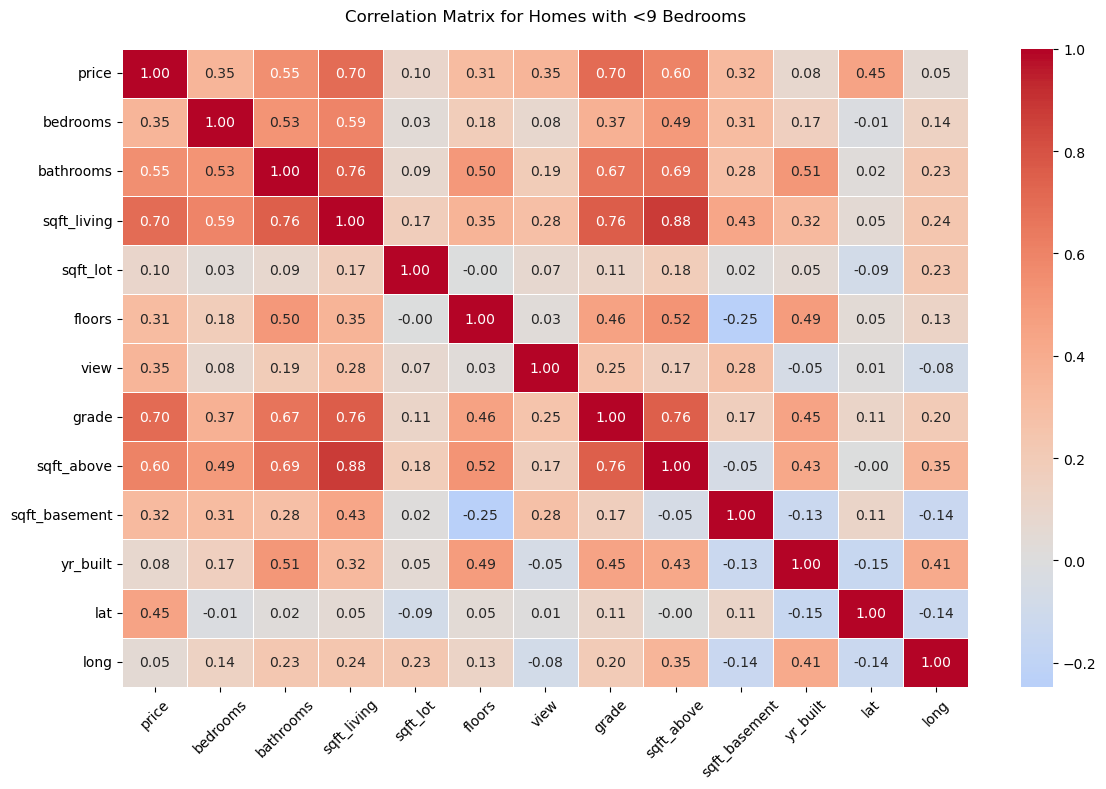

In [145]:
# Show correlation matrix of bedrooms with 8 and below values

small_bed_homes = low_bedroom_homes.copy()

numeric_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
                'floors', 'view', 'grade', 'sqft_above', 'sqft_basement',
                'yr_built', 'lat', 'long']

corr_data = small_bed_homes[numeric_cols]

corr_matrix = corr_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    center=0,
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Matrix for Homes with <9 Bedrooms", pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

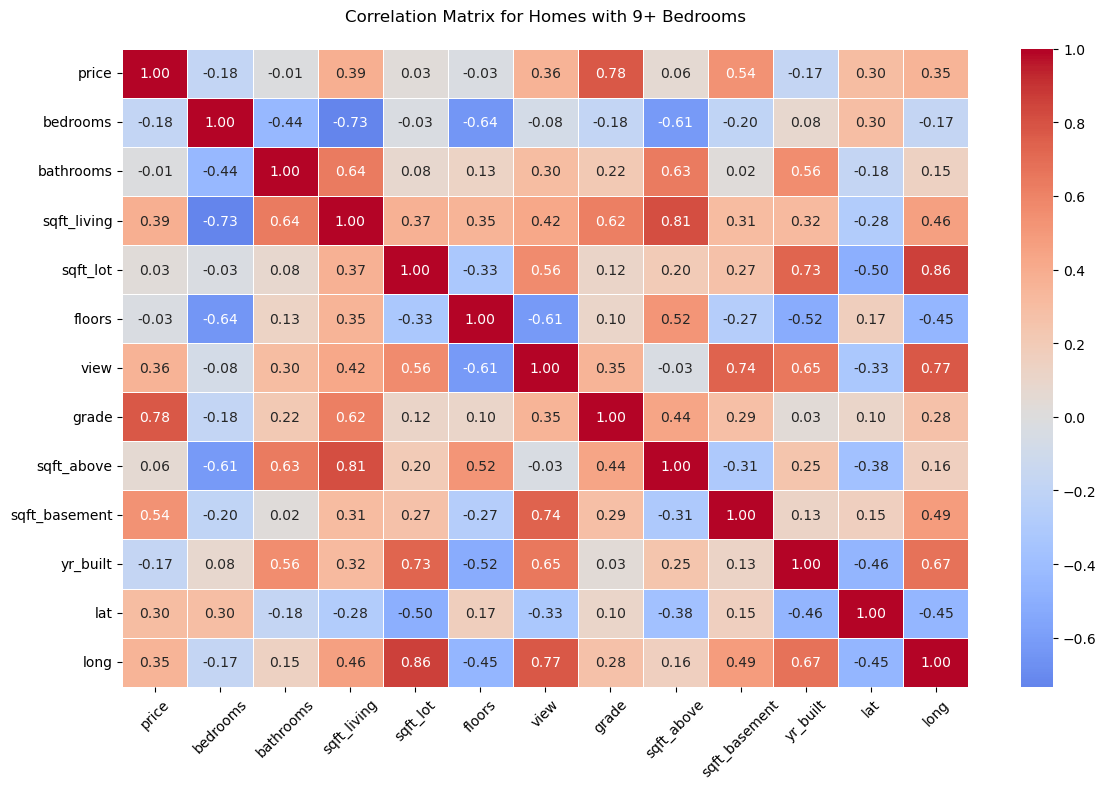

In [146]:
# Focus on bedrooms with 9 and above values

large_bed_homes = high_bedroom_homes.copy()

corr_data = large_bed_homes[numeric_cols]

corr_matrix = corr_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    center=0,
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Matrix for Homes with 9+ Bedrooms", pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- Correlation matrix shows that price correlates better for bedrooms that are less than 9.
- The following ids need to be dropped after careful assessment:
    1) 2402100895 - Does not make sense as it has 33 bedrooms and 1.75 bathrooms all in one floor -- all priced at 640,000$ only.
        This looks like a data entry error, so we will drop it instead of changing the bedroom count to 3 since we have no way of verifying typographical error.
    2) 1873400020 -- 340,000$ price is too low for a house that has 8 beds and 3 baths, and moderate sqft specs.
    3) Bedrooms that are 9 and above since their price points may not be explained by other factors as per correlation matrix. Only their grade (0.83) can justify the price point, and half of them are explained by sqft_living (0.47) and sqft_basement (0.45). Similarly, there is a negative correlation between bedrooms with sqft specs which does not make sense since we expect that higher space should allow more bedrooms.

In [147]:
# Document the rows to be dropped
drop2 = df[(df['id'] == 2402100895) & (df['id'] == 1873400020) & (df['bedrooms'] > 8)]

# Drop specific IDs and homes with more than 8 bedrooms
df = df[(df['id'] != 2402100895) & (df['id'] != 1873400020) & (df['bedrooms'] <= 8)]

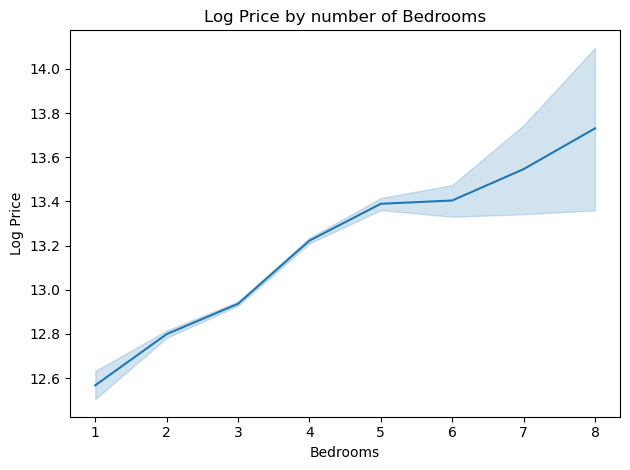

In [148]:
# Revisualize relationship of bedrooms with price

sns.lineplot(x=df['bedrooms'], y=df['price'])
plt.title('Log Price by number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Log Price')
plt.tight_layout()
plt.show()

## FEATURE: FLOORS

In [149]:
# For 'floors'
floors_counts = df['floors'].value_counts().sort_index()
print("\nFloors Tally:")
print(floors_counts)


Floors Tally:
floors
1.0    10670
1.5     1910
2.0     8227
2.5      159
3.0      611
3.5        7
Name: count, dtype: int64


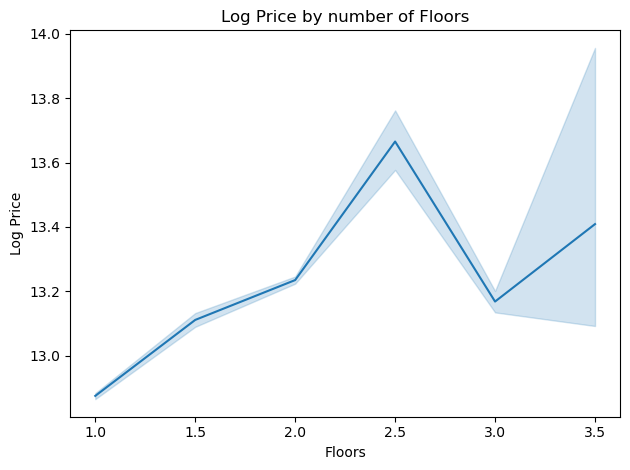

In [150]:
# Visualize relationship of floors with price to decide whether we can keep it as is or do a data cleaning/transformation

sns.lineplot(x=df['floors'], y=df['price'])
plt.title('Log Price by number of Floors')
plt.xlabel('Floors')
plt.ylabel('Log Price')
plt.tight_layout()
plt.show()

Will rounding up the floors help?

In [212]:
# Let's try rounding up method such that 0.5 to 1.25 is 1, 1.5 to 2.25 is 2, and so on.


df['floors_rounded'] = np.where(
    df['floors'] % 1 < 0.5,   # If decimal part is less than 0.5
    np.floor(df['floors']),    # Round down
    np.ceil(df['floors'])      # Otherwise round up
).astype(int)

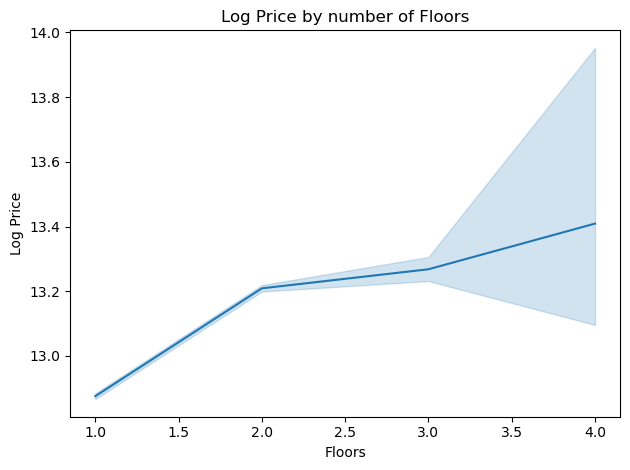

In [213]:
# Visualize relationship of floors with price to decide whether we can keep it as is or do a data cleaning/transformation

sns.lineplot(x=df['floors_rounded'], y=df['price'])
plt.title('Log Price by number of Floors')
plt.xlabel('Floors')
plt.ylabel('Log Price')
plt.tight_layout()
plt.show()

## FEATURE: WATERFRONT

In [153]:
# Count of waterfront vs. non-waterfront homes
waterfront_counts = df['waterfront'].value_counts()
waterfront_counts

waterfront
0    21421
1      163
Name: count, dtype: int64

Non-waterfront (0) Log Price Stats:
count    21421.000000
mean        13.039854
std          0.516801
min         11.264477
25%         12.676079
50%         13.017005
75%         13.367661
max         15.856731
Name: price, dtype: float64

Waterfront (1) Log Price Stats:
count    163.000000
mean      14.102619
std        0.686685
min       12.560248
25%       13.540988
50%       14.151984
75%       14.610740
max       15.770310
Name: price, dtype: float64


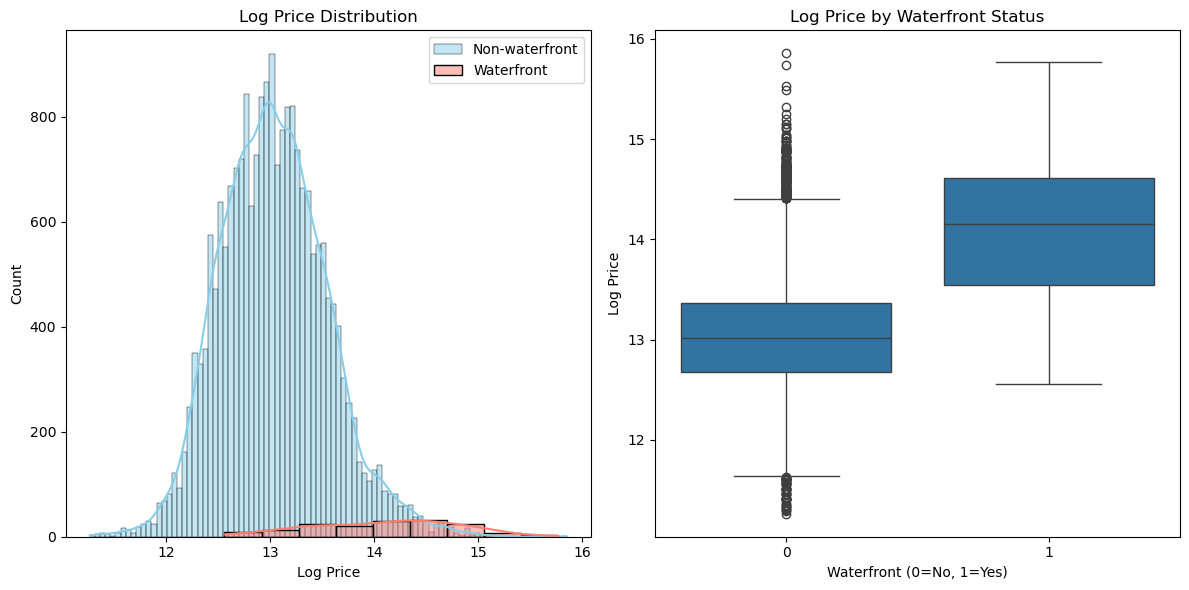


Welch's t-test: t = 19.72, p = 4.634e-45


In [154]:
# Compare price distribution of waterfront 0 and 1

df_waterfront_0 = df[df['waterfront'] == 0]['price']
df_waterfront_1 = df[df['waterfront'] == 1]['price']

# Descriptive Statistics
print("Non-waterfront (0) Log Price Stats:")
print(df_waterfront_0.describe())
print("\nWaterfront (1) Log Price Stats:")
print(df_waterfront_1.describe())

# Visualization
plt.figure(figsize=(12, 6))

# Histograms
plt.subplot(1, 2, 1)
sns.histplot(df_waterfront_0, color='skyblue', label='Non-waterfront', kde=True)
sns.histplot(df_waterfront_1, color='salmon', label='Waterfront', kde=True)
plt.title('Log Price Distribution')
plt.xlabel('Log Price')
plt.legend()

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['waterfront'], y=df['price'])
plt.title('Log Price by Waterfront Status')
plt.xlabel('Waterfront (0=No, 1=Yes)')
plt.ylabel('Log Price')

plt.tight_layout()
plt.show()

# Statistical Test (Welch's t-test)
t_stat, p_value = stats.ttest_ind(df_waterfront_1, df_waterfront_0, equal_var=False)
print(f"\nWelch's t-test: t = {t_stat:.2f}, p = {p_value:.3e}")

- There is a significant difference in the count of houses with and without a waterfront (p-value close to 0).
- Houses with a waterfront have a significant higher price by mean (~1,100,000$) and median (~950,000$) suggesting premium pricing.
- We need to keep this feature.

## FEATURE: VIEWS


views Tally:
view
0    19464
1      332
2      959
3      510
4      319
Name: count, dtype: int64


Text(0, 0.5, 'Log Price')

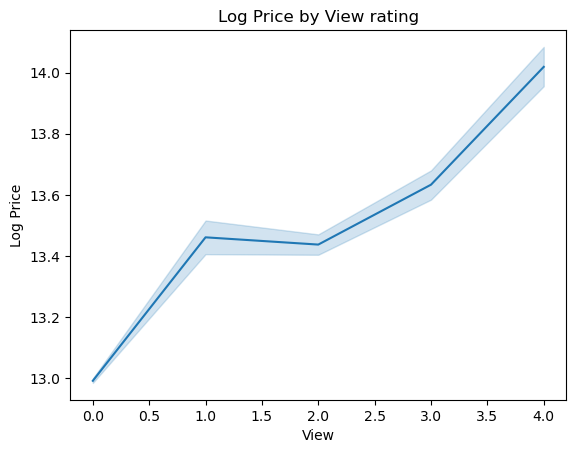

In [155]:
# Check data distribution of views

views_counts = df['view'].value_counts().sort_index()
print("\nviews Tally:")
print(views_counts)

# Visualize relationship of views with price to decide whether we can keep it as is or do a data cleaning/transformation

sns.lineplot(x=df['view'], y=df['price'])
plt.title('Log Price by View rating')
plt.xlabel('View')
plt.ylabel('Log Price')

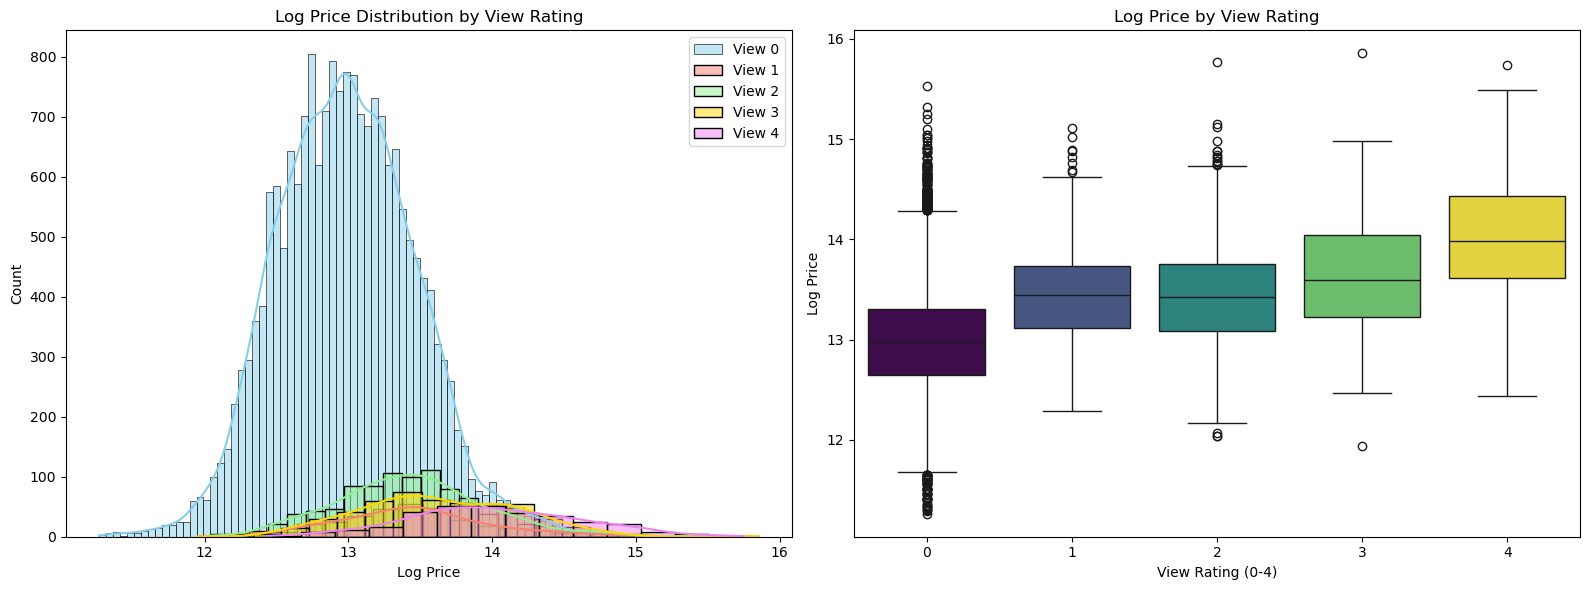


=== Statistical Significance ===
ANOVA: F = 763.80, p = 0.000e+00

Pairwise comparisons vs View 0:
View 1 vs View 0: t = 16.28, p = 1.717e-44
View 2 vs View 0: t = 25.96, p = 5.782e-115
View 3 vs View 0: t = 26.19, p = 1.217e-97
View 4 vs View 0: t = 30.91, p = 8.629e-99

Effect sizes (Cohen's d) vs View 0:
View 1 vs View 0: d = 0.93
View 2 vs View 0: d = 0.88
View 3 vs View 0: d = 1.24
View 4 vs View 0: d = 1.90


In [156]:
# Compare price distribution by view (0-4)
df_view_0 = df[df['view'] == 0]['price']
df_view_1 = df[df['view'] == 1]['price']
df_view_2 = df[df['view'] == 2]['price']
df_view_3 = df[df['view'] == 3]['price']
df_view_4 = df[df['view'] == 4]['price']


# Visualization
plt.figure(figsize=(16, 6))

# Histograms
plt.subplot(1, 2, 1)
for view, color in zip(range(5), ['skyblue', 'salmon', 'lightgreen', 'gold', 'violet']):
    sns.histplot(df[df['view'] == view]['price'], 
                 color=color, 
                 label=f'View {view}', 
                 kde=True,
                 alpha=0.5)
plt.title('Log Price Distribution by View Rating')
plt.xlabel('Log Price')
plt.legend()

# Boxplot (updated to fix the warning)
plt.subplot(1, 2, 2)
sns.boxplot(x='view', y='price', data=df, hue='view', palette='viridis', legend=False)
plt.title('Log Price by View Rating')
plt.xlabel('View Rating (0-4)')
plt.ylabel('Log Price')

plt.tight_layout()
plt.show()

# Statistical Tests
print("\n=== Statistical Significance ===")

# ANOVA (compares all groups)
f_stat, p_anova = stats.f_oneway(df_view_0, df_view_1, df_view_2, df_view_3, df_view_4)
print(f"ANOVA: F = {f_stat:.2f}, p = {p_anova:.3e}")

# Pairwise t-tests (compare each view to view 0)
print("\nPairwise comparisons vs View 0:")
for view in range(1, 5):
    t_stat, p_value = stats.ttest_ind(df[df['view'] == view]['price'], 
                                     df_view_0, 
                                     equal_var=False)
    print(f"View {view} vs View 0: t = {t_stat:.2f}, p = {p_value:.3e}")

# Effect size (Cohen's d)
def cohens_d(group1, group2):
    diff = group1.mean() - group2.mean()
    pooled_std = np.sqrt((group1.std()**2 + group2.std()**2) / 2)
    return diff / pooled_std

print("\nEffect sizes (Cohen's d) vs View 0:")
for view in range(1, 5):
    d = cohens_d(df[df['view'] == view]['price'], df_view_0)
    print(f"View {view} vs View 0: d = {d:.2f}")

- The results reveal a strong, statistically significant (p-value close to 0) higher price for homes with better views.
- This means view is also a premium feature of a house.

## FEATURE: CONDITION

condition
1       29
2      170
3    14010
4     5675
5     1700
Name: count, dtype: int64


Text(0, 0.5, 'Log Price')

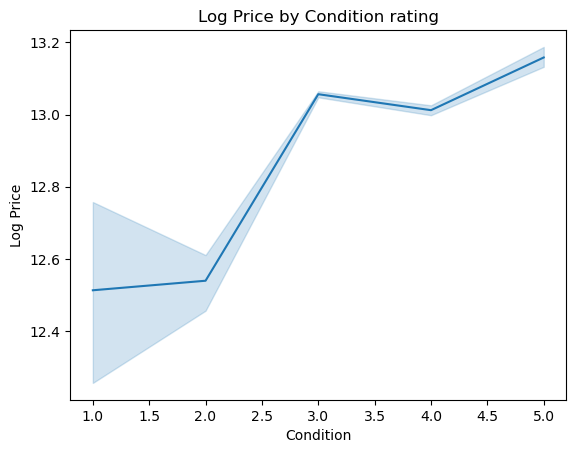

In [157]:
# Check data distribution of condition

condition_counts = df['condition'].value_counts().sort_index()
print(condition_counts)

# Visualize relationship of condition with price to decide whether we can keep it as is or do a data cleaning/transformation

sns.lineplot(x=df['condition'], y=df['price'])
plt.title('Log Price by Condition rating')
plt.xlabel('Condition')
plt.ylabel('Log Price')


There is stark difference between the data distributions, with majority of the houses at 3.
- We will visualize outliers and try remove them and see if this improves the trend.
- We will check if there is a significant difference between the prices of 2 different condition groups --> If not, we may consider binning technique.

Text(0, 0.5, 'Log Price')

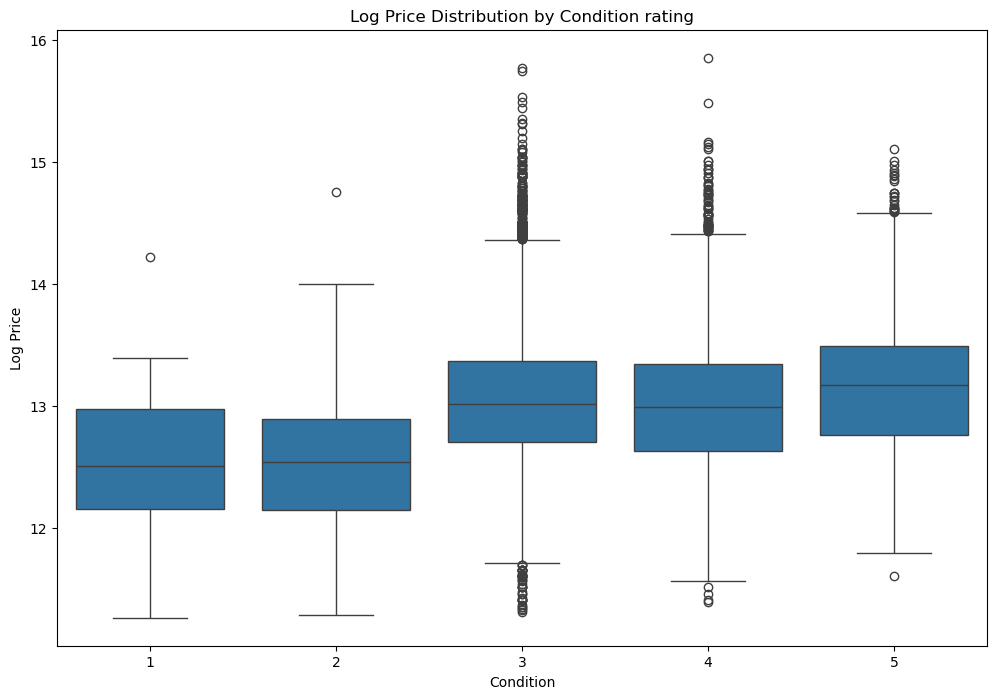

In [158]:
# Use boxplot to reveal outliers 
plt.figure(figsize=(12,8))
sns.boxplot(x='condition', y='price', data=df)
plt.title('Log Price Distribution by Condition rating')
plt.xlabel('Condition')
plt.ylabel('Log Price')

In [159]:
# Test for linear relationship
pearson_r, p_val = stats.pearsonr(df['condition'], df['price'])
print(f"Pearson correlation: r = {pearson_r:.3f}, p = {p_val:.3f}")

# Compare adjacent conditions
print("\nPairwise comparisons:")
for i in range(5):
    t_stat, p_val = stats.ttest_ind(
        df[df['condition'] == i]['price'],
        df[df['condition'] == i+1]['price'],
        equal_var=False
    )
    print(f"Condition {i} vs {i+1}: p = {p_val:.3f}")

Pearson correlation: r = 0.039, p = 0.000

Pairwise comparisons:
Condition 0 vs 1: p = nan
Condition 1 vs 2: p = 0.843
Condition 2 vs 3: p = 0.000
Condition 3 vs 4: p = 0.000
Condition 4 vs 5: p = 0.000


- Pearson correlation reveals that there is a weak positive relationship between condition and price, but this is statistically significant (not random).
- At this point, my goal is to minimize the number of rows that needs to dropped. Multiple methods will be explored.

### IQR method for handling outliers: 0.25 to 0.75 percentile

In [160]:
def remove_outliers1(price_series):
    Q1 = price_series.quantile(0.25)
    Q3 = price_series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return price_series.between(lower_bound, upper_bound)

# Apply the function
mask1 = df.groupby('condition')['price'].transform(remove_outliers1)
df_clean1 = df[mask1]

# Check the number of rows removed after cleaning

print(f"Original data: {len(df)} rows")
print(f"After outlier removal: {len(df_clean1)} rows")
print(f"Rows removed: {len(df) - len(df_clean1)}")

Original data: 21584 rows
After outlier removal: 21231 rows
Rows removed: 353


- 353 rows is 1.6% of the dataset.
- Make the IQR more inclusive to get top 15% outliers outside of upper and lower bounds, which will avoid removing useful data.

### IQR method for handling outliers: 0.15 to 0.85 percentile (more conservative)

In [161]:
def remove_outliers2(price_series):
    Q1 = price_series.quantile(0.15)
    Q3 = price_series.quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return price_series.between(lower_bound, upper_bound)

# Apply the function
mask2 = df.groupby('condition')['price'].transform(remove_outliers2)
df_clean2 = df[mask2]

# Check the number of rows removed after cleaning

print(f"Original data: {len(df)} rows")
print(f"After outlier removal: {len(df_clean2)} rows")
print(f"Rows removed: {len(df) - len(df_clean2)}")

Original data: 21584 rows
After outlier removal: 21566 rows
Rows removed: 18


Original rows: 21584
Rows after removal: 21566
Outliers removed: 18


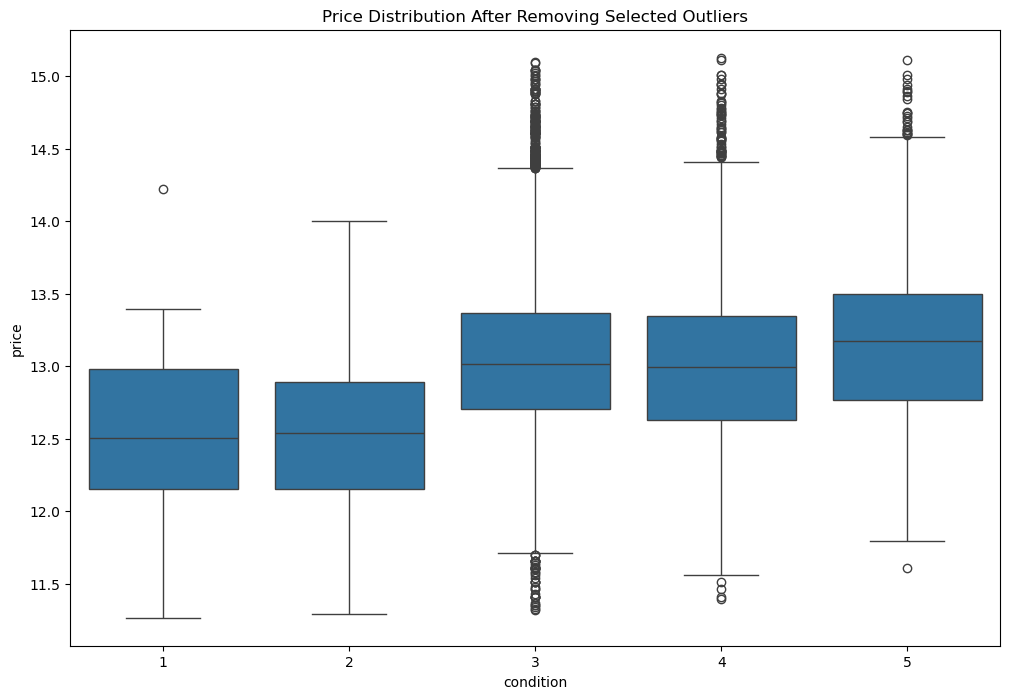

In [162]:
print(f"Original rows: {len(df)}")
print(f"Rows after removal: {len(df_clean2)}")
print(f"Outliers removed: {len(df) - len(df_clean2)}")

# Boxplot after removal
plt.figure(figsize=(12, 8))
sns.boxplot(x='condition', y='price', data=df_clean2)
plt.title("Price Distribution After Removing Selected Outliers")
plt.show()

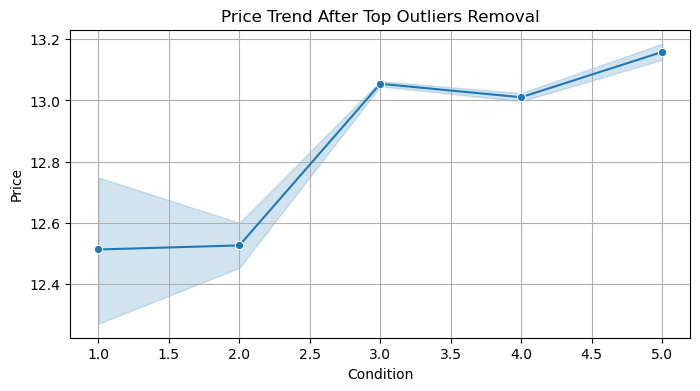

In [163]:
# Lineplot after removal
plt.figure(figsize=(8, 4))
sns.lineplot(x='condition', y='price', data=df_clean2, errorbar=('ci', 95), marker='o')
plt.title("Price Trend After Top Outliers Removal")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.grid(True)
plt.show()

### Binning method for handling outliers

In [164]:
# Define bins and convert to categorical to ensure proper group handling
bins = [0, 2, 3, 5]
labels = ['Low (1-2)', 'Medium (3)', 'High (4-5)']
df['condition_group'] = pd.cut(df['condition'], bins=bins, labels=labels, include_lowest=True).astype('category')

# Verify bin counts
print(df['condition_group'].value_counts())

condition_group
Medium (3)    14010
High (4-5)     7375
Low (1-2)       199
Name: count, dtype: int64


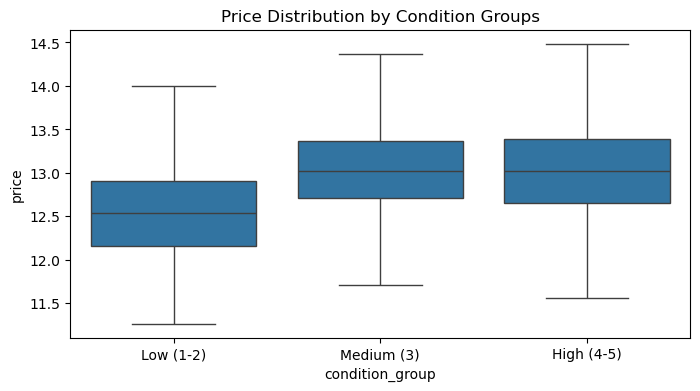

In [165]:
plt.figure(figsize=(8,4))
sns.boxplot(
    x='condition_group', 
    y='price', 
    data=df,
    order=labels,
    showfliers=False  # Hide remaining outliers for cleaner visualization
)
plt.title('Price Distribution by Condition Groups')
plt.show()

Text(0.5, 0, 'Condition group')

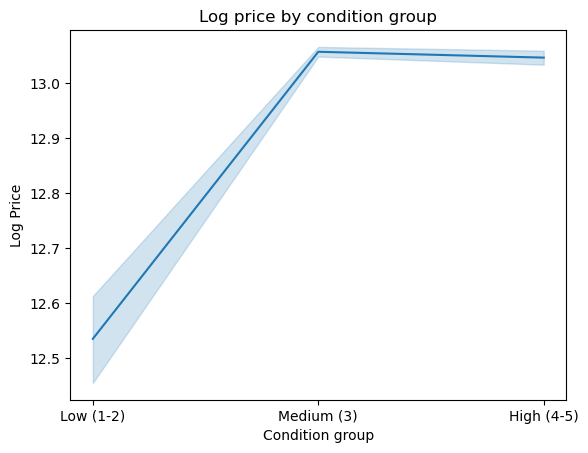

In [166]:
sns.lineplot(x='condition_group', y='price', data=df)
plt.title('Log price by condition group')
plt.ylabel('Log Price')
plt.xlabel('Condition group')

I decided to use to go with the removal of top outliers instead of IQR method and binning, as this will decrease the likelihood of modifying prices that may be significantly affected by other features.

In [167]:
# DataFrame with ONLY the outliers (removed rows)
drop3 = df[~mask2].copy()

# Dataframe cleaned using IQR 85-115% (conservative)

df = df[mask2].copy()

## FEATURE: GRADE

Text(0.5, 0, 'grade')

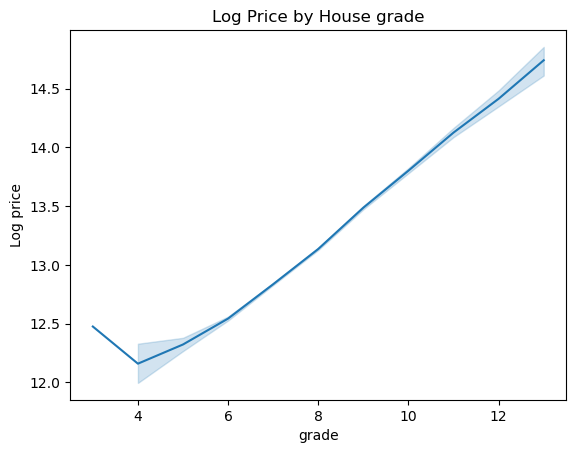

In [168]:
sns.lineplot(x='grade', y='price', data=df)
plt.title('Log Price by House grade')
plt.ylabel('Log price')
plt.xlabel('grade')

## FEATURES: sqft_living/lot, sqft_living15/lot15, sqft_above, sqft_basement

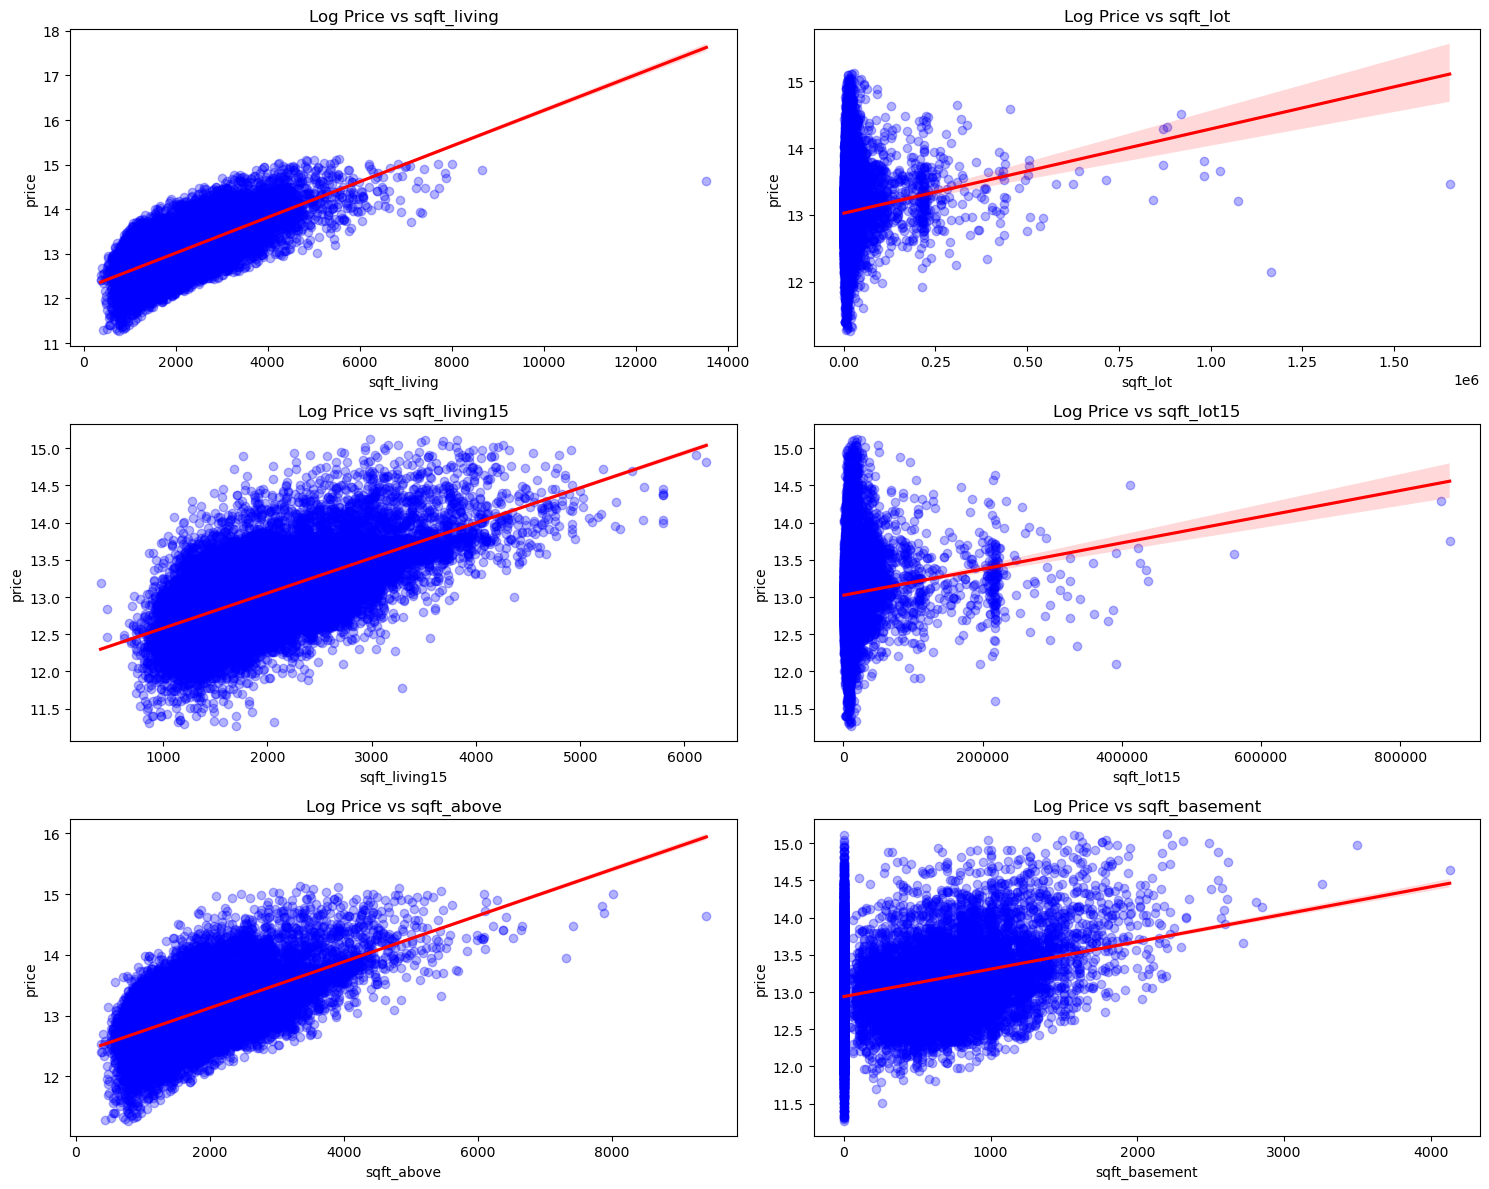

In [169]:
# List of features to plot
features = ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'sqft_basement']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.regplot(x=df[feature], y=df['price'], 
                scatter_kws={'alpha':0.3, 'color':'blue'},
                line_kws={'color':'red'})
    plt.title(f'Log Price vs {feature}')
plt.tight_layout()
plt.show()

### sqft_living and lot vs sqft_living15 and lot15

In [170]:
subset_features = ['price','sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'sqft_above', 'sqft_basement']
subset_df = df[subset_features]

sub_matrix = subset_df.corr()
sub_matrix

,price,sqft_living,sqft_living15,sqft_lot,sqft_lot15,sqft_above,sqft_basement
price,1.000000,0.689977,0.616302,0.099805,0.091897,0.594445,0.309765
sqft_living,0.689977,1.000000,0.758641,0.175077,0.186141,0.874103,0.425550
sqft_living15,0.616302,0.758641,1.000000,0.144570,0.183373,0.731583,0.195313
sqft_lot,0.099805,0.175077,0.144570,1.000000,0.718183,0.185081,0.014802
sqft_lot15,0.091897,0.186141,0.183373,0.718183,1.000000,0.196033,0.017127
sqft_above,0.594445,0.874103,0.731583,0.185081,0.196033,1.000000,-0.067589
sqft_basement,0.309765,0.425550,0.195313,0.014802,0.017127,-0.067589,1.000000


Sqft_living and sqft_lot have stronger correlation with price than the sqft_living15 and sqft_lot15.
Likewise, each of the pair show correlation which suggest that retaining one of them is better to avoid redundancy and overfitting.

In [171]:
subset_df.head()

,price,sqft_living,sqft_living15,sqft_lot,sqft_lot15,sqft_above,sqft_basement
0,12.309987,1180,1340,5650,5650,1180,0
1,13.195616,2570,1690,7242,7639,2170,400
2,12.100718,770,2720,10000,8062,770,0
3,13.311331,1960,1360,5000,5000,1050,910
4,13.142168,1680,1800,8080,7503,1680,0


It can be observed that sqft_living is the sum of sqft_above and sqft_basement. Let's confirm this for all rows.

In [172]:
# Return rows where sqft_living =! sqft_above and sqft_basement

def check_sqft_sum(subset_df):
    expected_sqft_living = subset_df['sqft_above'] + subset_df['sqft_basement']
    mismatch_mask = subset_df['sqft_living'] != expected_sqft_living
    return subset_df[mismatch_mask]


mismatches = check_sqft_sum(subset_df)
    
if mismatches.empty:
    print("All rows satisfy sqft_living = sqft_above + sqft_basement")
else:
    print("Rows where sqft_living != sqft_above + sqft_basement:")
    print(mismatches)

All rows satisfy sqft_living = sqft_above + sqft_basement


The strategy is to test a df with sqft_living and no sqft_basement and sqft_above, or vice versa, to check which one is better to keep. 
Keeping sqft_living only might decrease our interpretability (e.g. We cannot tell whether the basement or living space above can affect price more).

## FEATURES: sold date, yr_built and yr_renovation

Convert date to datetime then extract the month when the property was sold. No annual trends may be generated since the dataset is May 2014- May 2015.

In [173]:
# Convert to datetime (if not already done)
df['date'] = pd.to_datetime(df['date'])  

# Extract full month name (e.g., 'October')
df['month_sold'] = df['date'].dt.month

# Then drop the date column

df = df.drop(columns='date')

In [174]:
unique_yr_built = df['yr_built'].unique()
sorted_yr_built = sorted(unique_yr_built)
sorted_yr_built

[1900,
 1901,
 1902,
 1903,
 1904,
 1905,
 1906,
 1907,
 1908,
 1909,
 1910,
 1911,
 1912,
 1913,
 1914,
 1915,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [175]:
# Try binning method for yr_built


# Define the bin edges as decades
bins = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

# Define the labels for the bins 
labels = ['1900-1909', '1910-1919', '1920-1929', '1930-1939', '1940-1949', 
          '1950-1959', '1960-1969', '1970-1979', '1980-1989', '1990-1999', 
          '2000-2009', '2010-2015']

# Use the cut function to create the bins
df['yr_built_binned'] = pd.cut(df['yr_built'], bins=bins, labels=labels, right=False)

# Display the first few rows of the DataFrame
print(df[['yr_built', 'yr_built_binned']].head())

# Apply one-hot encoding to 'yr_built_binned'
df = pd.get_dummies(df, columns=['yr_built_binned'], drop_first=False)

   yr_built yr_built_binned
0      1955       1950-1959
1      1951       1950-1959
2      1933       1930-1939
3      1965       1960-1969
4      1987       1980-1989


In [176]:
# Renovation status instead of yr built and yr renovated

df['renovation'] = df['yr_renovated'].apply(lambda x: 1 if x != 0 else 0)

#Set renovation column as boolean

df['renovation'] = df['renovation'].astype('bool')

# drop the columns not useful in the succeeding analysis
df = df.drop(columns=['yr_built', 'yr_renovated'])


## FEATURES: Zipcode, Lat, Long

- Lat and long are both very specific to the location of the house.
- The goal of this study is to know which cities the price tend to be higher, so we can just drop the lat and long columns to simplify our model as well.
- We can start by using zipcode only, then include lat and long only when the model does not perform well.

In [177]:
# One-hot encoding of zipcode

df = pd.get_dummies(df, columns=['zipcode'], drop_first=True)

# Review of wrangled data and finalization of dataframe for analysis

In [178]:
df.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,bathrooms_rounded,floors_rounded,condition_group,month_sold,yr_built_binned_1900-1909,yr_built_binned_1910-1919,yr_built_binned_1920-1929,yr_built_binned_1930-1939,yr_built_binned_1940-1949,yr_built_binned_1950-1959,yr_built_binned_1960-1969,yr_built_binned_1970-1979,yr_built_binned_1980-1989,yr_built_binned_1990-1999,yr_built_binned_2000-2009,yr_built_binned_2010-2015,renovation,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,12.309987,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,1,1,Medium (3),10,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,6414100192,13.195616,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,2,2,Medium (3),12,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,5631500400,12.100718,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062,1,1,Medium (3),2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2487200875,13.311331,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000,3,1,High (4-5),12,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,1954400510,13.142168,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503,2,1,Medium (3),2,False,False,F

In [179]:
# Select the features that will be used in the next steps

unwanted_features = ['id', 'bathrooms', 'sqft_living', 'floors', 'condition_group', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

df_final = df.drop(columns=unwanted_features, errors='ignore')

df_final.head(5)

,price,bedrooms,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,bathrooms_rounded,floors_rounded,month_sold,yr_built_binned_1900-1909,yr_built_binned_1910-1919,yr_built_binned_1920-1929,yr_built_binned_1930-1939,yr_built_binned_1940-1949,yr_built_binned_1950-1959,yr_built_binned_1960-1969,yr_built_binned_1970-1979,yr_built_binned_1980-1989,yr_built_binned_1990-1999,yr_built_binned_2000-2009,yr_built_binned_2010-2015,renovation,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,12.309987,3.0,5650,0,0,3,7,1180,0,1,1,10,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,13.195616,3.0,7242,0,0,3,7,2170,400,2,2,12,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,12.100718,2.0,10000,0,0,3,6,770,0,1,1,2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,13.311331,4.0,5000,0,0,5,7,1050,910,3,1,12,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,13.142168,3.0,8080,0,0,3,8,1680,0,2,1,2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [222]:
df_final.shape

(21566, 94)

In [223]:
# Review of datatypes

from tabulate import tabulate

# Display dtypes in a table format
print(tabulate([(col, dtype) for col, dtype in df_final.dtypes.items()], headers=['Column', 'Dtype']))

Column                     Dtype
-------------------------  --------
log_price                  float64
bedrooms                   int64
sqft_lot                   int64
waterfront                 bool
view                       category
condition                  category
grade                      category
sqft_above                 int64
sqft_basement              int64
bathrooms                  int64
floors                     int64
month_sold                 category
yr_built_binned_1900-1909  bool
yr_built_binned_1910-1919  bool
yr_built_binned_1920-1929  bool
yr_built_binned_1930-1939  bool
yr_built_binned_1940-1949  bool
yr_built_binned_1950-1959  bool
yr_built_binned_1960-1969  bool
yr_built_binned_1970-1979  bool
yr_built_binned_1980-1989  bool
yr_built_binned_1990-1999  bool
yr_built_binned_2000-2009  bool
yr_built_binned_2010-2015  bool
renovation                 bool
zipcode_98002              bool
zipcode_98003              bool
zipcode_98004              bool
zipcode_98

In [224]:
#  Corrections to be made

features_int = ['bedrooms']
features_boolean = ['waterfront'] # Features that are either yes or no
features_order = ['view', 'condition', 'grade', 'month_sold'] # Features that are ordinal or categorical


# Apply correction
df_final[features_int] = df_final[features_int].astype('int64')
df_final[features_boolean] = df_final[features_boolean].astype('bool')
df_final[features_order] = df_final[features_order].astype('category')

In [225]:
# Renaming of columns for ease of analysis

df_final = df_final.rename(columns={
    'price': 'log_price',
    'bathrooms_rounded': 'bathrooms',
    'floors_rounded': 'floors'
})

In [227]:
# Overview of dropped rows

droppedrows = pd.concat([drop1, drop2, drop3])
droppedrows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bathrooms_rounded,floors_rounded,condition_group
4024,9175600025,20141007T000000,13.592368,7.0,6.75,7480,41664,2.0,0,2,3,11,5080,2400,1953,0,98166,47.4643,-122.368,2810,33190,7,NaN,NaN
1164,1247600105,20141020T000000,15.446867,5.0,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788,5,2.0,Medium (3)
1315,7558700030,20150413T000000,15.483218,6.0,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619,6,2.0,High (4-5)
1448,8907500070,20150413T000000,15.492607,5.0,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,5,2.0,Medium (3)
2085,8106100105,20141114T000000,15.163584,4.0,4.25,5770,21300,2.0,1,4,4,11,5770,0,1980,0,98040,47.5850,-122.222,4620,22748,4,2.0,High (4-5)
2626,7738500731,20140815T000000,15.319588,5.0,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408,6,2.0,Medium (3)
3914,9808700762,20140611T000000,15.770310,5.0,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,5,2.0,Medium (3)
4149,6447300265,20141014T000000,15.201805,4.0,5.50,7080,16573,2.0,0,0,3,12,5760,1320,2008,0,98039,47.6151,-122.224,3140,15996,6,2.0,Medium (3)
4411,2470100110,20140804T000000,15.532906,5.0,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,6,2.0,Medium (3)
7035,853200010,20140701T000000,15.150512,5.0,5.50,7050,42840,1.0,0,2,4,13,4320,2730,1978,0,98004,47.6229,-122.220,5070,20570,6,1.0,High (4-5)


In [228]:
# Export finalized dataframe

df_final.to_csv('/Users/joycegemcanete/DataAnalyst2025/finalclean-data-house-data-2015')

# EXPLORATORY DATA ANALYSIS

In [229]:
df_final.head(5)

,log_price,bedrooms,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,bathrooms,floors,month_sold,yr_built_binned_1900-1909,yr_built_binned_1910-1919,yr_built_binned_1920-1929,yr_built_binned_1930-1939,yr_built_binned_1940-1949,yr_built_binned_1950-1959,yr_built_binned_1960-1969,yr_built_binned_1970-1979,yr_built_binned_1980-1989,yr_built_binned_1990-1999,yr_built_binned_2000-2009,yr_built_binned_2010-2015,renovation,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,12.309987,3,5650,False,0,3,7,1180,0,1,1,10,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,13.195616,3,7242,False,0,3,7,2170,400,2,2,12,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,12.100718,2,10000,False,0,3,6,770,0,1,1,2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,13.311331,4,5000,False,0,5,7,1050,910,3,1,12,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,13.142168,3,8080,False,0,3,8,1680,0,2,1,2,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [187]:
df.shape

(21566, 103)

In [230]:
df_final.describe()

,log_price,bedrooms,sqft_lot,sqft_above,sqft_basement,bathrooms,floors
count,21566.000000,21566.000000,2.156600e+04,21566.000000,21566.000000,21566.000000,21566.000000
mean,13.045963,3.367384,1.509250e+04,1784.586664,290.165307,2.309979,1.541640
std,0.522336,0.892772,4.143886e+04,817.993655,439.073569,0.856848,0.567049
min,11.264477,1.000000,5.200000e+02,370.000000,0.000000,1.000000,1.000000
25%,12.680756,3.000000,5.040000e+03,1190.000000,0.000000,2.000000,1.000000
50%,13.017005,3.000000,7.615500e+03,1560.000000,0.000000,2.000000,2.000000
75%,13.373904,4.000000,1.066000e+04,2210.000000,560.000000,3.000000,2.000000
max,15.126543,8.000000,1.651359e+06,9410.000000,4130.000000,8.000000,4.000000


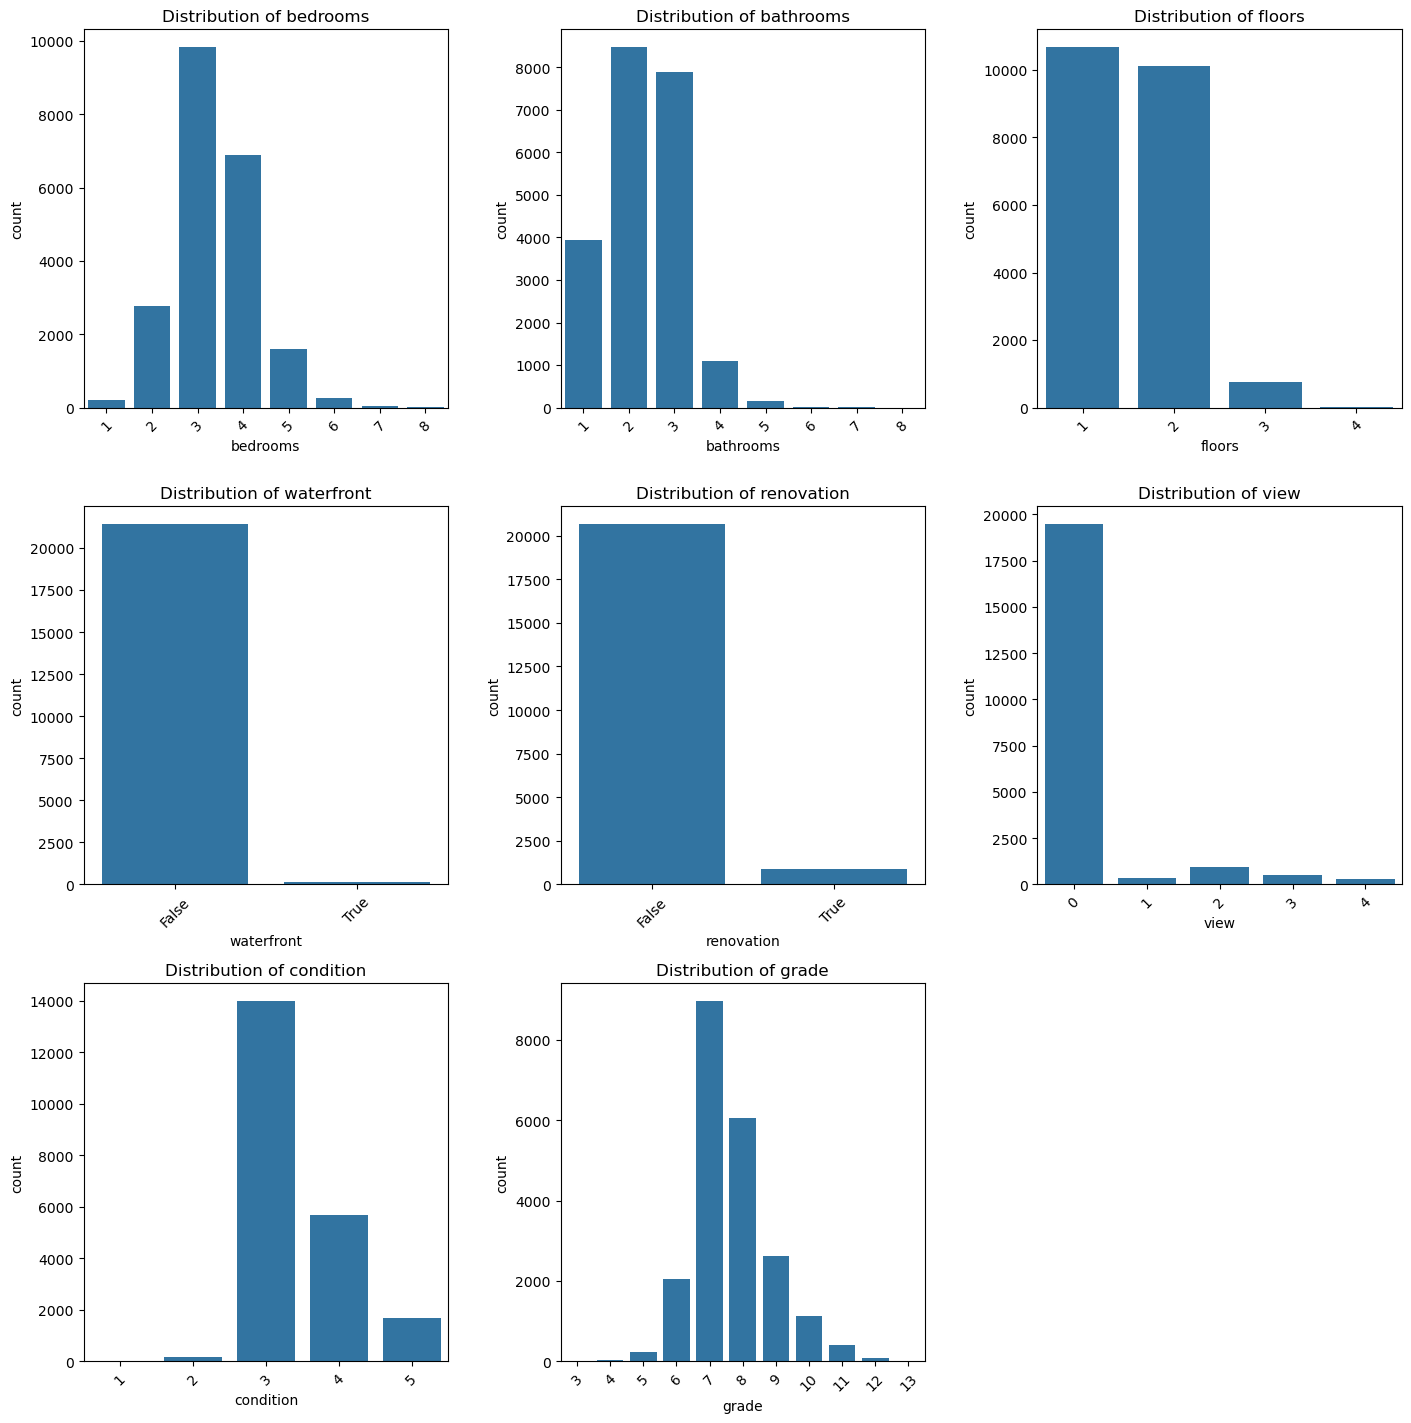

In [189]:
# Categorical variables BIVARIATE ANALYSIS
cat_vars = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'renovation', 'view', 'condition', 'grade']

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.tight_layout(pad=5.0)  # Add padding between subplots

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Plot each categorical variable in a subplot
for i, var in enumerate(cat_vars):
    sns.countplot(data=df_final, x=var, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].tick_params(axis='x', rotation=45)
    
# Hide the last two empty subplots (since we have 7 variables in 3x3 grid)
for j in range(len(cat_vars), 9):
    axes[j].axis('off')

plt.show()

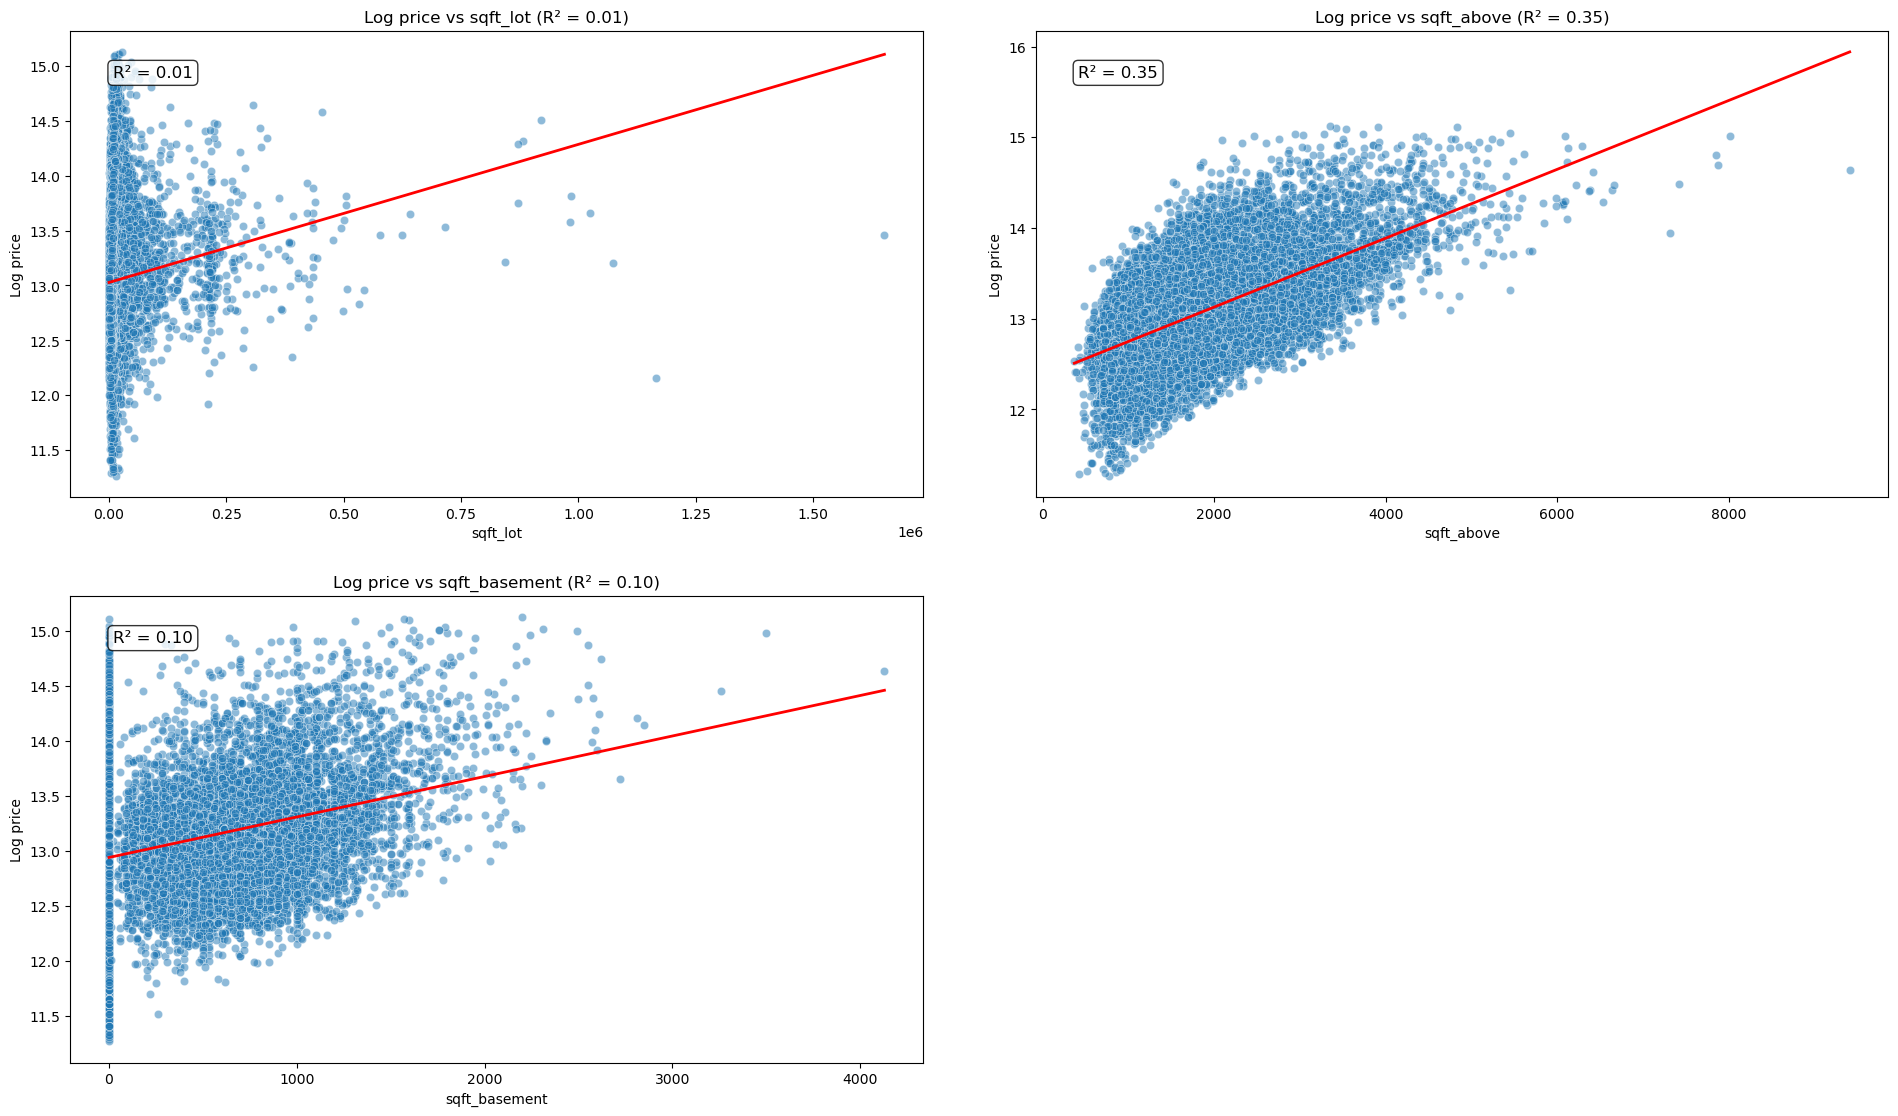

In [190]:
# Numerical variables for analysis
num_vars = ['sqft_lot', 'sqft_above', 'sqft_basement']

# Create a 2x2 grid of subplots (adjust if you have more variables)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.tight_layout(pad=5.0)
axes = axes.ravel()

# Plot each numerical variable against log_price with regression line
for i, var in enumerate(num_vars):
    # Scatter plot
    sns.scatterplot(data=df_final, x=var, y='log_price', alpha=0.5, ax=axes[i])
    
    # Calculate regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_final[var], df_final['log_price'])
    line = slope * df_final[var] + intercept
    
    # Plot regression line
    sns.lineplot(x=df_final[var], y=line, color='red', ax=axes[i], linewidth=2)
    
    # Add R-squared text annotation
    axes[i].annotate(f'R² = {r_value**2:.2f}', 
                    xy=(0.05, 0.9), 
                    xycoords='axes fraction',
                    fontsize=12,
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    axes[i].set_title(f'Log price vs {var} (R² = {r_value**2:.2f})', fontsize=12)
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel('Log price', fontsize=10)

# Remove empty subplot if odd number of variables
if len(num_vars) < len(axes):
    fig.delaxes(axes[-1])

plt.show()

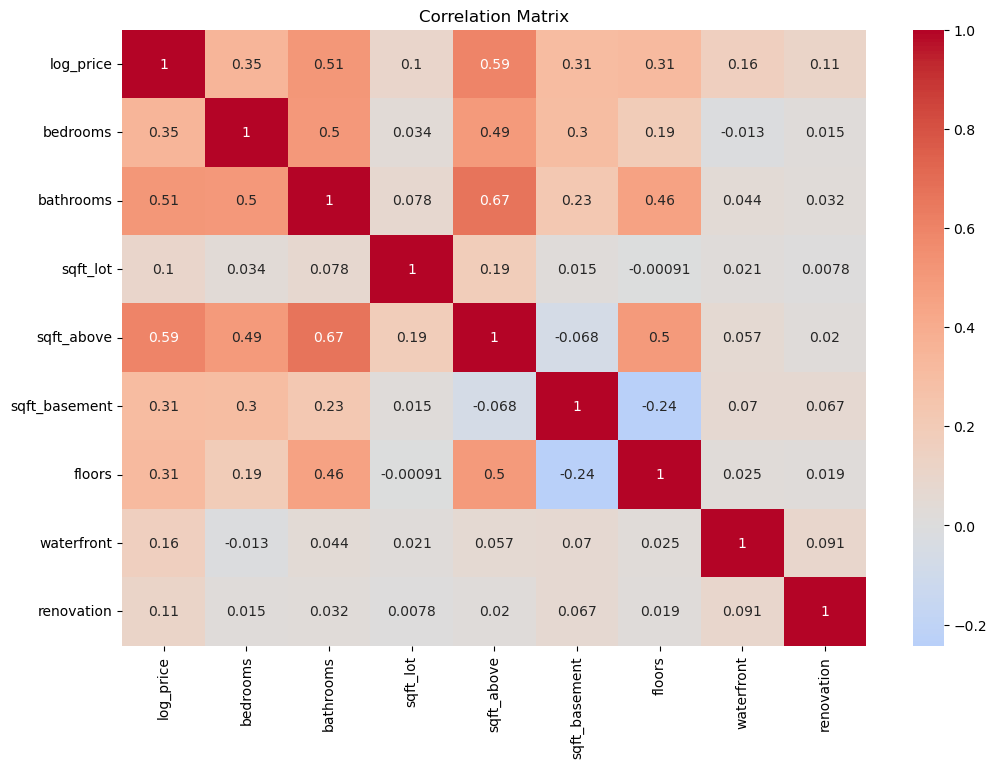

In [191]:
# Correlate a subset of features for Correlation Matrix

df_corr = ['log_price', 'bedrooms', 'bathrooms', 'sqft_lot', 'sqft_above', 'sqft_basement', 'floors', 'waterfront', 'renovation', 'view', 'condition', 'grade']

corr_matrix = df_final[df_corr].corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [192]:
# Price correlation

price_corr = corr_matrix['log_price'].sort_values(ascending=False)
print("\n=== Correlation with Price ===")
price_corr


=== Correlation with Price ===


log_price        1.000000
sqft_above       0.594445
bathrooms        0.508297
bedrooms         0.349214
floors           0.312646
sqft_basement    0.309765
waterfront       0.163699
renovation       0.112290
sqft_lot         0.099805
Name: log_price, dtype: float64

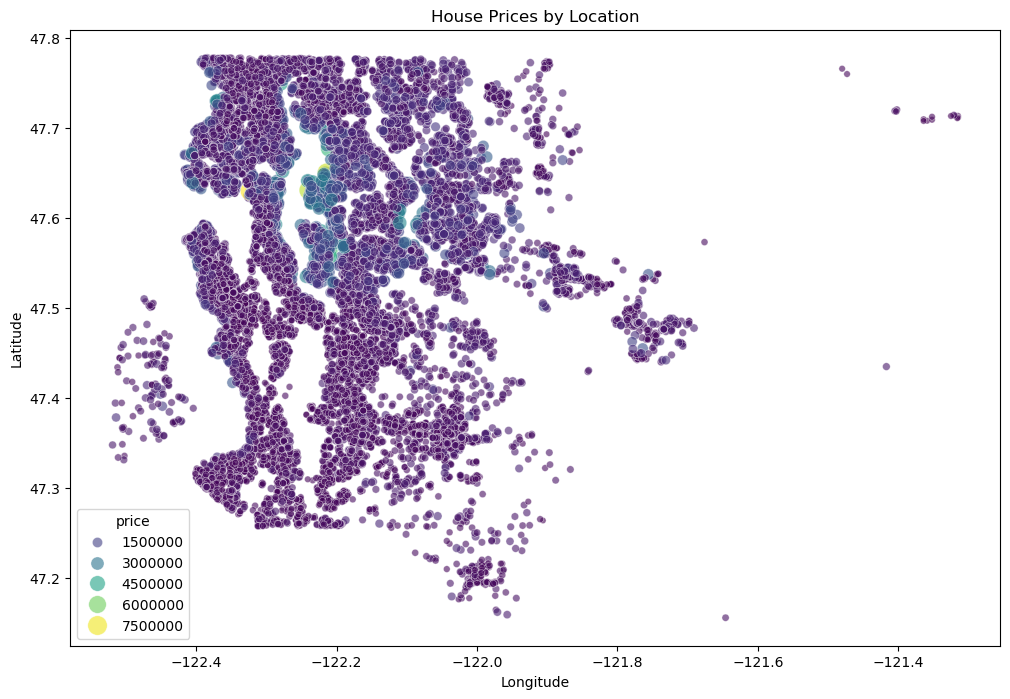

In [193]:
# Geographic analysis of the original df

geo_df = pd.read_csv('/Users/joycegemcanete/DataAnalyst2025/original-data-house-data-2015')

plt.figure(figsize=(12, 8))
sns.scatterplot(data=geo_df, x='long', y='lat', hue='price', size='price',
                sizes=(20, 200), alpha=0.6, palette='viridis')
plt.title('House Prices by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

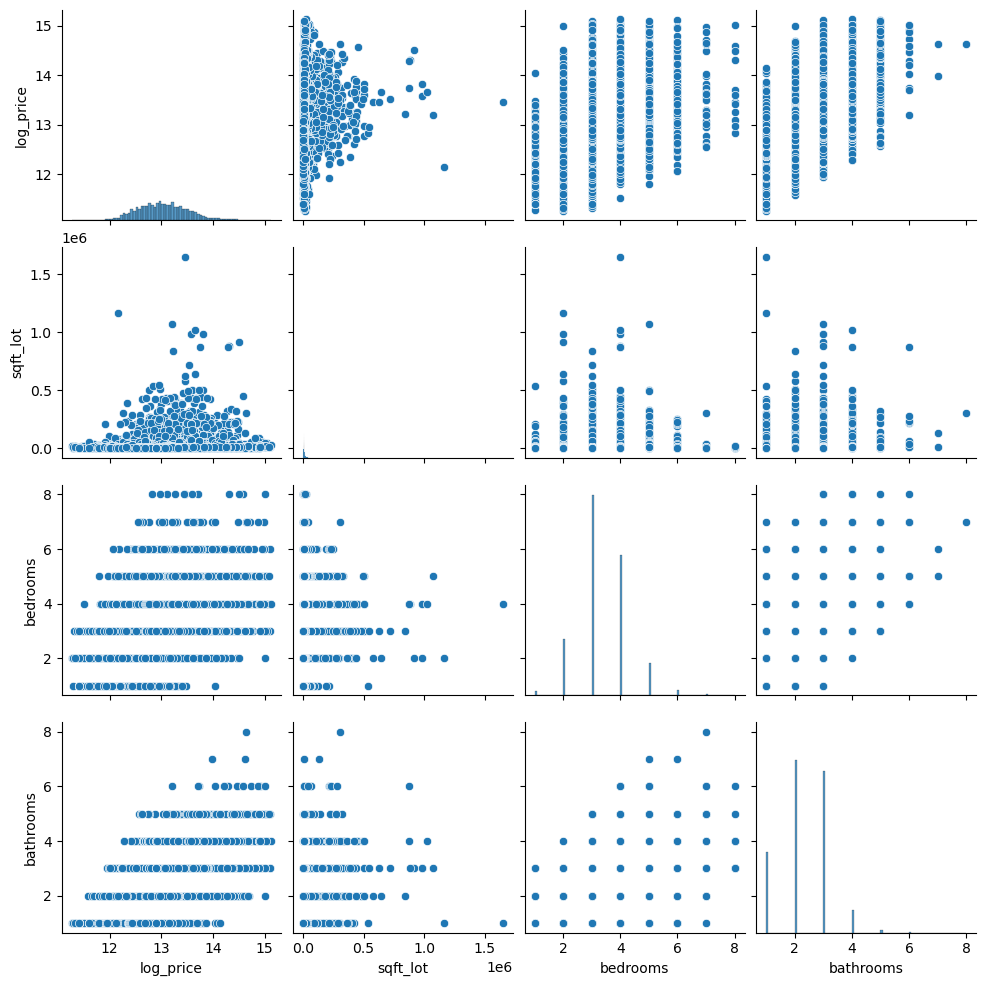

In [194]:
# Pairplot for key variables
key_vars = ['log_price', 'sqft_lot', 'bedrooms', 'bathrooms', 'grade']
sns.pairplot(df_final[key_vars])
plt.show()

# INITIAL MODEL DEVELOPMENT FOR PRICE PREDICTION

Since linear regression is considered to be one of the most basic models, we will utilize it first.

### Monovariate linear regression

In [195]:
# Monovariate LR analysis -- using sqft_above because it has the highest correlation score with price.

lr = LinearRegression()

x = df_final[['sqft_above']]
y = df_final[['log_price']]

lr.fit(x,y)
r2_lr = lr.score(x,y)
print("R² score of monovariate Linear regression model:", r2_lr)

R² score of monovariate Linear regression model: 0.35336540656848925


### Multivariate linear regression (MVLR)

In [196]:
# Multivariate LR analysis

z = df_final.drop(columns=['log_price'])

y = df_final[['log_price']]

lr.fit(z,y)
r2_multilr = lr.score(z,y)
print("R² score of multivariate Linear regression model:", r2_multilr)

R² score of multivariate Linear regression model: 0.8749649275681867


### Pipeline-based Multivariate Linear Regression (P-MVLR) optimization

In [197]:
# Define the pipeline
Input = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
]
pipe_MVLR = Pipeline(Input)

# Ensure data is float type
z = z.astype(float)

# Fit the pipeline
pipe_MVLR.fit(z, y)

# Make predictions
ypipe = pipe_MVLR.predict(z)

# Calculate and print R-squared score
r2_pmvlr = r2_score(y, ypipe)
print("R² score of optimized multivariate linear regression model:", r2_pmvlr)

R² score of optimized multivariate linear regression model: 0.9077972930416011


Let's assess whether this model is really good by performing model and cross validations.

### Model validation of P-MVLR

In [198]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.2, random_state=42)

# Fit the model on the training data
pipe_MVLR.fit(x_train, y_train)

# Predict on the test data
y_pred = pipe_MVLR.predict(x_test)

# Evaluation
r2_pmvlr = r2_score(y_test, y_pred)
print("Validated R² score of P-MVLR model:", r2_pmvlr)


Validated R² score of P-MVLR model: -1.2826683867853423e+22


### Cross-validation of P-MVLR

In [199]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation and evaluate the R² score
cv_scores_pmvlr = cross_val_score(pipe_MVLR, z, y, cv=5, scoring='r2')

# Print the cross-validation scores
print(f"Cross-validated R² scores of P-MVLR: {cv_scores_pmvlr}")
print(f"Mean cross-validated R² score of P-MVLR: {cv_scores_pmvlr.mean()}")


Cross-validated R² scores of P-MVLR: [-5.04801719e+22 -1.09799841e+23 -3.29162051e+22 -4.17821149e+22
 -7.61815866e+21]
Mean cross-validated R² score of P-MVLR: -4.851929835389539e+22


The resulting validated r2-scores of linear regression model are not good, so we will no longer try to optimize the model. Other models must be explored.

# MORE MODEL DEVELOPMENT and REFINEMENT

In [200]:
# Start another train-test split

y_data = df_final['log_price']
x_data=df_final.drop('log_price',axis=1) #everything except target column
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20,random_state=42)

## Ridge regression model

In [201]:
RidgeModel=Ridge()
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
r2_rr = r2_score(y_test, yhat)

print("R² score of Ridge regression model:", r2_rr)

R² score of Ridge regression model: 0.8637923580161719


### Pipeline-based Ridge Regression (P-RR)

In [202]:
# Create the pipeline
model_pipRR = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge(alpha=0.1))
])

# Fit the model_pipRR
model_pipRR.fit(x_train, y_train)

# Predict
ypred = model_pipRR.predict(x_test)

# Evaluate
r2_piprr = r2_score(y_test, ypred)
print("R² score of pipeline-based Ridge regression model:", r2_piprr)


R² score of pipeline-based Ridge regression model: 0.8745418578834845


Initial R² scores of RR model are good, so we will try to optimize the model.

### Hyperparameter tuning of P-RR

In [203]:
# Optimize hyperparameters alpha and degree of P-RR using GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'poly__degree': [1, 2],
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grid = GridSearchCV(model_pipRR, param_grid, cv=5, scoring='r2')
grid.fit(x_train, y_train)

print("Best parameters of P-RR:", grid.best_params_)
print("Best R² score of P-RR:", grid.best_score_)

Best parameters of P-RR: {'poly__degree': 2, 'ridge__alpha': 1000}
Best R² score of P-RR: 0.8768127033430947


Inject the optimized hyperparameters back to RR pipeline.

In [204]:
# Create the pipeline
omodel_pipRR = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', Ridge(alpha=1000))
])

# Fit the omodel_pipRR
omodel_pipRR.fit(x_train, y_train)

# Predict
ypred = omodel_pipRR.predict(x_test)

# Evaluate
r2_optrr = r2_score(y_test, ypred)
print("R² score of optimized Ridge regression model:", r2_optrr)

R² score of optimized Ridge regression model: 0.8761176657791185


In [210]:
# 5-fold CV for robust evaluation of optimized RR
 
cv_scores_optrr = cross_val_score(omodel_pipRR, x_train, y_train, cv=5, scoring='r2')
print(f"Mean CV R² of optimized Ridge regression: {cv_scores_optrr.mean():.4f} (±{cv_scores_optrr.std():.4f})")

Mean CV R² of optimized Ridge regression: 0.8768 (±0.0074)


## Random Forest Regressor (RFR) Model

In [239]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

r2_rf = r2_score(y_test, y_pred)
print("R² score of optimized Random Forest model:", r2_rf)

R² score of optimized Random Forest model: 0.8115381592345914


In [240]:
# 5-fold CV for robust evaluation of RFR
 
cv_scores_rfr = cross_val_score(rf_model, x_train, y_train, cv=5, scoring='r2')
print(f"Mean CV R² of RFR model: {cv_scores_rfr.mean():.4f} (±{cv_scores_rfr.std():.4f})")

Mean CV R² of RFR model: 0.8223 (±0.0059)


Since basic RFR model has a lower R² score than the basic Ridge Regression, we will stop here.

## CatBoost Model

In [232]:
# CatBoost might be useful since it is good with handling both categorical and numerical features.

from catboost import CatBoostRegressor

# Identify categorical columns
cat_features = ['view', 'condition', 'grade', 'month_sold']

# Initialize cb_model with categorical features
cb_model = CatBoostRegressor(
    cat_features=cat_features,
    verbose=0) # to hide the learning rate progress

# Fit cb_model
cb_model.fit(x_train, y_train)

# Make predictions
y_pred_cb = cb_model.predict(x_test)

r2_cb = r2_score(y_test, y_pred_cb)
print("R² score of CatBoost model:", r2_cb)

R² score of CatBoost model: 0.8699840113063004


Since R² score of CatBoost model is promising, we will continue optimizing the model.

In [234]:
# Define parameter grid
param_grid = {
    'depth': [4, 6, 8],           # Tree depth
    'learning_rate': [0.01, 0.1],  # Step size
    'iterations': [500, 1000],     # Number of trees
    'l2_leaf_reg': [1, 3],         # Regularization
    'border_count': [32, 64]       # Splits for numerical features
}

# Initialize cb_model
cb_model = CatBoostRegressor(cat_features=cat_features, verbose=0)

# Grid Search
grid = GridSearchCV(cb_model, param_grid, cv=5, scoring='r2')
grid.fit(x_train, y_train)

print("Best R² of CatBoost:", grid.best_score_)
print("Best Params of CatBoost:", grid.best_params_)

Best R² of CatBoost: 0.8832936836064789
Best Params of CatBoost: {'border_count': 64, 'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 3, 'learning_rate': 0.1}


Inject the best hyperparameters back to the CatBoost model.

In [235]:
# Initialize optimized opt_cb_model
opt_cb_model = CatBoostRegressor(
    cat_features=cat_features,
    iterations=1000,
    learning_rate=0.1, 
    depth=6,
    border_count=64,
    l2_leaf_reg=3,
    verbose=0
)

# Fit opt_cb_model
opt_cb_model.fit(x_train, y_train)

# Make predictions
y_pred_cb = opt_cb_model.predict(x_test)

# Evaluate
r2_optcb = r2_score(y_test, y_pred_cb)
print("R² score of optimized CatBoost model:", r2_optcb)

R² score of optimized CatBoost model: 0.8711372632716712


In [236]:
# 5-fold CV for robust evaluation of optimized CatBoost
 
cv_scores_optcb = cross_val_score(opt_cb_model, x_train, y_train, cv=5, scoring='r2')
print(f"Mean CV R² of optimized CatBoost: {cv_scores_optcb.mean():.4f} (±{cv_scores_optcb.std():.4f})")

Mean CV R² of optimized CatBoost: 0.8833 (±0.0034)


In [241]:
# Comparison of validated R² scores all the trained models used in this analysis

r2_pmvlr #not optimized due to bad score during validation
cv_scores_pmvlr
r2_optrr
cv_scores_optrr
r2_rf #not optimized due to bad score during validation
cv_scores_rfr
r2_optcb
cv_scores_optcb

array([0.88472922, 0.87861606, 0.8880265 , 0.88489945, 0.88019718])

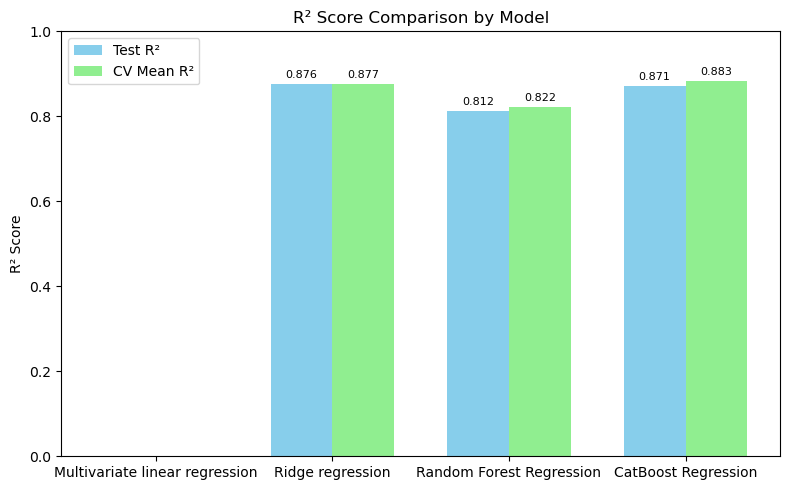

In [242]:
# Model names
models = ['Multivariate linear regression', 'Ridge regression', 'Random Forest Regression', 'CatBoost Regression']

# R² scores on test set
r2_scores = [r2_pmvlr, r2_optrr, r2_rf, r2_optcb]

# Mean CV scores
cv_scores = [np.mean(cv_scores_pmvlr),
             np.mean(cv_scores_optrr),
             np.mean(cv_scores_rfr),
             np.mean(cv_scores_optcb)]

# Bar positions
x = np.arange(len(models))
width = 0.35  # width of the bars

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))

# Bars for test R²
bars1 = ax.bar(x - width/2, r2_scores, width, label='Test R²', color='skyblue')

# Bars for CV mean R²
bars2 = ax.bar(x + width/2, cv_scores, width, label='CV Mean R²', color='lightgreen')

# Add labels and title
ax.set_ylabel('R² Score')
ax.set_title('R² Score Comparison by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1)  # assuming R² ranges between 0 and 1
ax.legend()

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# Show plot
plt.tight_layout()
plt.show()


## Learning Curve: Ridge Regression vs Catboost

- A learning curve can check for any unacceptable underfitting/overfitting.
- If the model has mild overfitting/underfitting (e.g. < 0.05 - 0.1 difference between validation R² and training R²), model should be acceptable.
- This trained model will be used to predict prices in the next project.

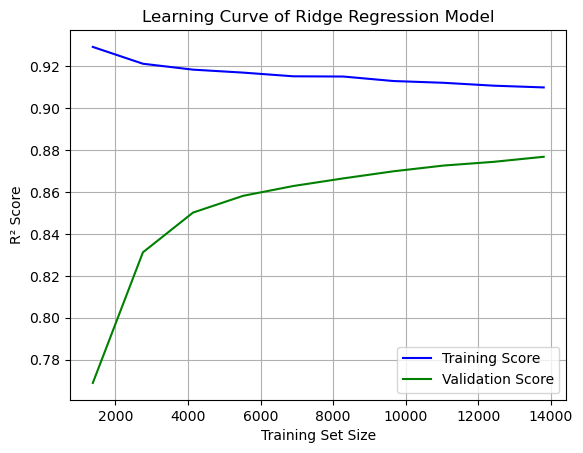

In [243]:
# Ridge

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

train_sizes, train_scores, val_scores = learning_curve(
    estimator=omodel_pipRR,
    X=x_train,
    y=y_train,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='r2'
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.plot(train_sizes, val_mean, label='Validation Score', color='green')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.title('Learning Curve of Ridge Regression Model')
plt.legend()
plt.grid(True)
plt.show()

- The difference between training score (91) and validation score (~88) is around 3.
- It can be seen that the validation R² climbs to ~0.875, and the training R² moves to ~0.91 as the sample size increases to 14,000. 
- The difference is ~0.035, which is very small and generally acceptable. The model seems to be in a good state regarding the bias-variance tradeoff.

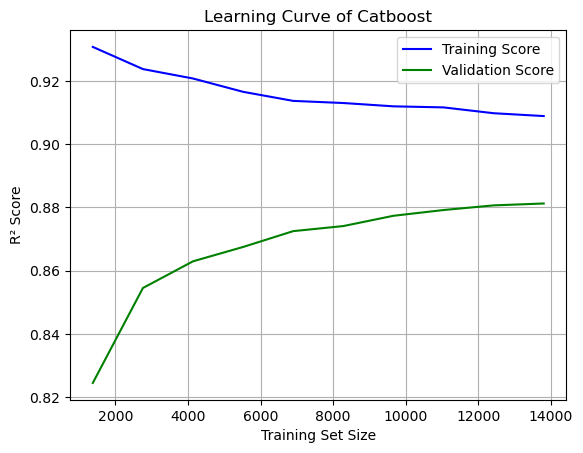

In [244]:
# Catboost

train_sizes, train_scores, val_scores = learning_curve(
    estimator=cb_model,
    X=x_train,
    y=y_train,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='r2'
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.plot(train_sizes, val_mean, label='Validation Score', color='green')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.title('Learning Curve of Catboost')
plt.legend()
plt.grid(True)
plt.show()

- It can be seen that the validation R² climbs to ~0.88, and the training R² moves to ~0.905 as the sample size increases to 14,000. 
- The difference is ~0.025, which is very small and generally acceptable. The model seems to be in a good state regarding the bias-variance tradeoff.

In [245]:
# Save the trained pipeline
import joblib
joblib.dump(omodel_pipRR, '/Users/joycegemcanete/DataAnalyst2025/ridgeregression_pipeline.pkl')

['/Users/joycegemcanete/DataAnalyst2025/ridgeregression_pipeline.pkl']

In [246]:
opt_cb_model.save_model('/Users/joycegemcanete/DataAnalyst2025/catboost_model.cbm') #catboost

## Which feature contributes the most to price prediction?

In [249]:
# Get feature importances, use Catboost (best model for handling both numerical and categorical)
importances = opt_cb_model.get_feature_importance()

# Combine with feature names
feature_names = x_train.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort descending
feat_imp_df.sort_values(by='Importance', ascending=False, inplace=True)

# Show top 10 features
print(feat_imp_df.head(10))


          Feature  Importance
5           grade   25.610580
6      sqft_above   11.224029
7   sqft_basement    8.431441
1        sqft_lot    4.952997
3            view    3.185832
26  zipcode_98004    3.059629
36  zipcode_98023    2.810947
4       condition    2.108321
49  zipcode_98042    1.729027
63  zipcode_98092    1.512869


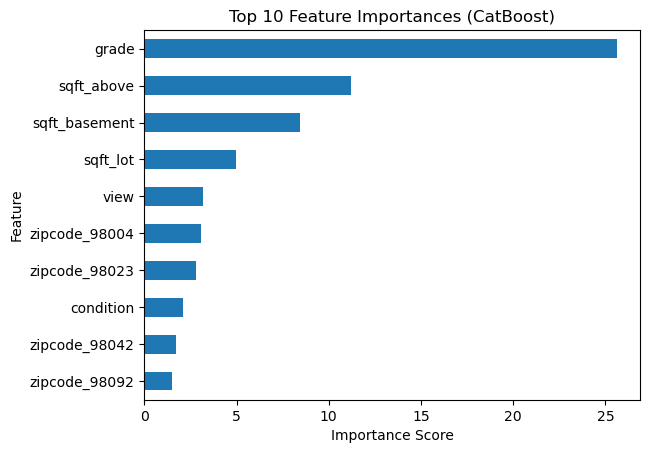

In [251]:
feat_imp_df.head(10).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.xlabel('Importance Score')
plt.title('Top 10 Feature Importances (CatBoost)')
plt.gca().invert_yaxis()
plt.show()

- Grade has the greatest contribution to price, followed by the size of living space (above and basement) and lot.
- Houses with a good view also contributes to a premium pricing.
- Location in Bellevue also drives the price up, probably driven by a strong tech industry, which attracts high-paying jobs and a skilled workforce, leading to increased demand for housing and other goods and services. 

Overall, Ridge Regression and CatBoost perform well, with the Ridge regression having a slightly better test r-squared score and run time (3.1s) than Catboost (4s).
However, Ridge Regression accounts for linearity and may perform less with a bigger dataset.
Catboost on the otherhand can handle both numerical and categorical data more efficiently, and accounts for non-linearity between features,
Therefore, I would recommend using Catboost.

Hello there! I hope you enjoyed my first full data analysis project. If you have questions, or if you spot parts that need fixing, please let me know!
This project took me a week, with multiple iterations and a lot of assistance from AI at first.
I can say that one of indicators that I got better is being able to understand the concept behind the tools and functions in this notebook.
I admit that the way I approach this may be too elementary and non-critical, but anyway I had so much fun! I'm so excited to grow as a Data Analyst! -Joyce